**NAME: ANUSKA GHOSH**
**GITHUB REPO LINK: https://github.com/anuskaghosh17/Linear_Regression** 

### 1. DATA CLEANING AND PREPROCESSING

**IMPORTING REQUIRED LIBRARIES**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

**LOADING THE DATASET**

In [82]:
df = pd.read_csv(r"C:\Users\anusk\Downloads\AmesHousing.csv")
df

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2      NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3      NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4      NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2926   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2927   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

**SUMMARY OF THE DATASET**

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

**STATISTICAL SUMMARY OF THE DATASET**

In [84]:
df.describe().T

count          mean           std          min  \
Order            2930.0  1.465500e+03  8.459625e+02          1.0   
PID              2930.0  7.144645e+08  1.887308e+08  526301100.0   
MS SubClass      2930.0  5.738737e+01  4.263802e+01         20.0   
Lot Frontage     2440.0  6.922459e+01  2.336533e+01         21.0   
Lot Area         2930.0  1.014792e+04  7.880018e+03       1300.0   
Overall Qual     2930.0  6.094881e+00  1.411026e+00          1.0   
Overall Cond     2930.0  5.563140e+00  1.111537e+00          1.0   
Year Built       2930.0  1.971356e+03  3.024536e+01       1872.0   
Year Remod/Add   2930.0  1.984267e+03  2.086029e+01       1950.0   
Mas Vnr Area     2907.0  1.018968e+02  1.791126e+02          0.0   
BsmtFin SF 1     2929.0  4.426296e+02  4.555908e+02          0.0   
BsmtFin SF 2     2929.0  4.972243e+01  1.691685e+02          0.0   
Bsmt Unf SF      2929.0  5.592625e+02  4.394942e+02          0.0   
Total Bsmt SF    2929.0  1.051615e+03  4.406151e+02          0.0   
1st Flr SF       2930.0  1.159558e+03  3.918909e+02        334.0   
2nd Flr SF       2930.0  3.354560e+02  4.283957e+02          0.0   
Low Qual Fin SF  2930.0  4.676792e+00  4.631051e+01          0.0   
Gr Liv Area      2930.0  1.499690e+03  5.055089e+02        334.0   
Bsmt Full Bath   2928.0  4.313525e-01  5.248202e-01          0.0   
Bsmt Half Bath   2928.0  6.113388e-02  2.452536e-01          0.0   
Full Bath        2930.0  1.566553e+00  5.529406e-01          0.0   
Half Bath        2930.0  3.795222e-01  5.026293e-01          0.0   
Bedroom AbvGr    2930.0  2.854266e+00  8.277311e-01          0.0   
Kitchen AbvGr    2930.0  1.044369e+00  2.140762e-01          0.0   
TotRms AbvGrd    2930.0  6.443003e+00  1.572964e+00          2.0   
Fireplaces       2930.0  5.993174e-01  6.479209e-01          0.0   
Garage Yr Blt    2771.0  1.978132e+03  2.552841e+01       1895.0   
Garage Cars      2929.0  1.766815e+00  7.605664e-01          0.0   
Garage Area      2929.0  4.728197e+02  2.150465e+02          0.0   
Wood Deck SF     2930.0  9.375188e+01  1.263616e+02          0.0   
Open Porch SF    2930.0  4.753345e+01  6.748340e+01          0.0   
Enclosed Porch   2930.0  2.301160e+01  6.413906e+01          0.0   
3Ssn Porch       2930.0  2.592491e+00  2.514133e+01          0.0   
Screen Porch     2930.0  1.600205e+01  5.608737e+01          0.0   
Pool Area        2930.0  2.243345e+00  3.559718e+01          0.0   
Misc Val         2930.0  5.063515e+01  5.663443e+02          0.0   
Mo Sold          2930.0  6.216041e+00  2.714492e+00          1.0   
Yr Sold          2930.0  2.007790e+03  1.316613e+00       2006.0   
SalePrice        2930.0  1.807961e+05  7.988669e+04      12789.0   

                          25%          50%           75%           max  
Order            7.332500e+02       1465.5  2.197750e+03  2.930000e+03  
PID              5.284770e+08  535453620.0  9.071811e+08  1.007100e+09  
MS SubClass      2.000000e+01         50.0  7.000000e+01  1.900000e+02  
Lot Frontage     5.800000e+01         68.0  8.000000e+01  3.130000e+02  
Lot Area         7.440250e+03       9436.5  1.155525e+04  2.152450e+05  
Overall Qual     5.000000e+00          6.0  7.000000e+00  1.000000e+01  
Overall Cond     5.000000e+00          5.0  6.000000e+00  9.000000e+00  
Year Built       1.954000e+03       1973.0  2.001000e+03  2.010000e+03  
Year Remod/Add   1.965000e+03       1993.0  2.004000e+03  2.010000e+03  
Mas Vnr Area     0.000000e+00          0.0  1.640000e+02  1.600000e+03  
BsmtFin SF 1     0.000000e+00        370.0  7.340000e+02  5.644000e+03  
BsmtFin SF 2     0.000000e+00          0.0  0.000000e+00  1.526000e+03  
Bsmt Unf SF      2.190000e+02        466.0  8.020000e+02  2.336000e+03  
Total Bsmt SF    7.930000e+02        990.0  1.302000e+03  6.110000e+03  
1st Flr SF       8.762500e+02       1084.0  1.384000e+03  5.095000e+03  
2nd Flr SF       0.000000e+00          0.0  7.037500e+02  2.065000e+03  
Low Qual Fin SF  0.000000e+00          0.0  0.000000e+00

**CHECKING FOR MISSING VALUES**

In [85]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

**HANDLE MISSING VALUES**

In [86]:
# Drop columns with more than 30% missing values
threshold = 0.3 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Fill missing numeric values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

C:\Users\anusk\AppData\Local\Temp\ipykernel_71876\3468173611.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].fillna(df[num_cols].median())
C:\Users\anusk\AppData\Local\Temp\ipykernel_71876\3468173611.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [87]:
df

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL          68.0      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Lot Shape Land Contour Utilities  ... Enclosed Porch 3Ssn Porch  \
0          IR1          Lvl    AllPub  ...              0          0   
1          Reg          Lvl    AllPub  ...              0          0   
2          IR1          Lvl    AllPub  ...              0          0   
3          Reg          Lvl    AllPub  ...              0          0   
4          IR1          Lvl    AllPub  ...              0          0   
...        ...          ...       ...  ...            ...        ...   
2925       IR1          Lvl    AllPub  ...              0          0   
2926       IR1          Low    AllPub  ...              0          0   
2927       Reg          Lvl    AllPub  ...              0          0   
2928       Reg          Lvl    AllPub  ...              0          0   
2929       Reg          Lvl    AllPub  ...              0          0   

     Screen Porch Pool Area Misc Val Mo Sold Yr Sold  Sale Type  \
0               0         0        0       5    2010        WD    
1             120         0        0       6    2010        WD    
2               0         0    12500       6    2010        WD    
3               0         0        0       4    2010        WD    
4               0         0        0       3    2010        WD    
...           ...       ...      ...     ...     ...        ...   
2925            0         0        0       3    2006        WD    
2926            0         0        0       6    2006        WD    
2927            0         0      700       7    2006        WD    
2928            0         0        0       4    2006        WD    
2929            0         0        0      11    2006        WD    

      Sale Condition  SalePrice  
0             Normal     215000  
1             Normal     105000  
2             Normal     172000  
3             Normal     244000  
4             Normal     189900  
...              ...        ...  
2925          Normal     142500  
2926          Normal     131000  
2927          Normal     132000  
2928          Normal     170000  
2929          Normal     188000  

[2930 rows x 78 columns]

**ENCODING CATEGORICAL VARIABLES**

In [88]:
df = pd.get_dummies(df, drop_first=True)
df

Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0         1  526301100           20         141.0     31770             6   
1         2  526350040           20          80.0     11622             5   
2         3  526351010           20          81.0     14267             6   
3         4  526353030           20          93.0     11160             7   
4         5  527105010           60          74.0     13830             5   
...     ...        ...          ...           ...       ...           ...   
2925   2926  923275080           80          37.0      7937             6   
2926   2927  923276100           20          68.0      8885             5   
2927   2928  923400125           85          62.0     10441             5   
2928   2929  924100070           20          77.0     10010             5   
2929   2930  924151050           60          74.0      9627             7   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  \
0                5        1960            1960         112.0  ...   
1                6        1961            1961           0.0  ...   
2                6        1958            1958         108.0  ...   
3                5        1968            1968           0.0  ...   
4                5        1997            1998           0.0  ...   
...            ...         ...             ...           ...  ...   
2925             6        1984            1984           0.0  ...   
2926             5        1983            1983           0.0  ...   
2927             5        1992            1992           0.0  ...   
2928             5        1974            1975           0.0  ...   
2929             5        1993            1994          94.0  ...   

      Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0               False          False          False          False   
1               False          False          False          False   
2               False          False          False          False   
3               False          False          False          False   
4               False          False          False          False   
...               ...            ...            ...            ...   
2925            False          False          False          False   
2926            False          False          False          False   
2927            False          False          False          False   
2928            False          False          False          False   
2929            False          False          False          False   

      Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0              True                   False                  False   
1              True                   False                  False   
2              True                   False                  False   
3              True                   False                  False   
4              True                   False                  False   
...             ...                     ...                    ...   
2925           True                   False                  False   
2926           True                   False                  False   
2927           True                   False                  False   
2928           True                   False                  False   
2929           True                   False                  False   

      Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                     False                   True                   False  
1                     False                   True                   False  
2                     False                   True                   False  
3                     False                   True                   False  
4                     False                   True                   False  
...                     ...                    ...                     ...  
2925                  False    

**STANDARDIZE NUMERICAL FEATURES**

In [89]:
# Standardizing numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [90]:
df

Order       PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0    -1.731460 -0.997164    -0.877005      3.375742  2.744381     -0.067254   
1    -1.730277 -0.996904    -0.877005      0.514952  0.187097     -0.776079   
2    -1.729095 -0.996899    -0.877005      0.561850  0.522814     -0.067254   
3    -1.727913 -0.996888    -0.877005      1.124628  0.128458      0.641571   
4    -1.726731 -0.992903     0.061285      0.233563  0.467348     -0.776079   
...        ...       ...          ...           ...       ...           ...   
2925  1.726731  1.106582     0.530430     -1.501671 -0.280621     -0.067254   
2926  1.727913  1.106588    -0.877005     -0.047827 -0.160296     -0.776079   
2927  1.729095  1.107245     0.647716     -0.329216  0.037199     -0.776079   
2928  1.730277  1.110954    -0.877005      0.374257 -0.017506     -0.776079   
2929  1.731460  1.111225     0.061285      0.233563 -0.066118      0.641571   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  \
0        -0.506718   -0.375537       -1.163488      0.061046  ...   
1         0.393091   -0.342468       -1.115542     -0.566039  ...   
2         0.393091   -0.441674       -1.259380      0.038650  ...   
3        -0.506718   -0.110988       -0.779919     -0.566039  ...   
4        -0.506718    0.848000        0.658466     -0.566039  ...   
...            ...         ...             ...           ...  ...   
2925      0.393091    0.418109       -0.012780     -0.566039  ...   
2926     -0.506718    0.385040       -0.060726     -0.566039  ...   
2927     -0.506718    0.682657        0.370789     -0.566039  ...   
2928     -0.506718    0.087423       -0.444296     -0.566039  ...   
2929     -0.506718    0.715726        0.466681     -0.039736  ...   

      Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0               False          False          False          False   
1               False          False          False          False   
2               False          False          False          False   
3               False          False          False          False   
4               False          False          False          False   
...               ...            ...            ...            ...   
2925            False          False          False          False   
2926            False          False          False          False   
2927            False          False          False          False   
2928            False          False          False          False   
2929            False          False          False          False   

      Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0              True                   False                  False   
1              True                   False                  False   
2              True                   False                  False   
3              True                   False                  False   
4              True                   False                  False   
...             ...                     ...                    ...   
2925           True                   False                  False   
2926           True                   False                  False   
2927           True                   False                  False   
2928           True                   False                  False   
2929           True                   False                  False   

      Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                     False                   True                   False  
1                     False                   True                   False  
2                     False                   True                   False  
3                     False                   True                   False  
4                     False                   True                   False  
...                     ...                    ...                     ...  
2925      

### 2. EXPLORATORY DATA ANALYSIS(EDA)

**SUMMARY STATISTICS**

In [91]:
df.describe().T

count          mean       std       min       25%       50%  \
Order            2930.0  0.000000e+00  1.000171 -1.731460 -0.865730  0.000000   
PID              2930.0 -1.843046e-16  1.000171 -0.997164 -0.985632 -0.948660   
MS SubClass      2930.0 -9.700242e-18  1.000171 -0.877005 -0.877005 -0.173287   
Lot Frontage     2930.0  2.825196e-16  1.000171 -2.252042 -0.423012 -0.047827   
Lot Area         2930.0  5.820145e-17  1.000171 -1.123022 -0.343671 -0.090297   
Overall Qual     2930.0 -8.002700e-17  1.000171 -3.611379 -0.776079 -0.067254   
Overall Cond     2930.0  2.691817e-16  1.000171 -4.105955 -0.506718 -0.506718   
Year Built       2930.0 -2.141328e-15  1.000171 -3.285571 -0.573948  0.054354   
Year Remod/Add   2930.0 -2.491750e-15  1.000171 -1.642950 -0.923757  0.418735   
Mas Vnr Area     2930.0  3.880097e-17  1.000171 -0.566039 -0.566039 -0.566039   
BsmtFin SF 1     2930.0 -7.275182e-18  1.000171 -0.971824 -0.971824 -0.159418   
BsmtFin SF 2     2930.0 -6.972049e-17  1.000171 -0.293918 -0.293918 -0.293918   
Bsmt Unf SF      2930.0  8.487712e-17  1.000171 -1.272866 -0.774400 -0.212203   
Total Bsmt SF    2930.0 -1.697542e-16  1.000171 -2.387456 -0.587091 -0.139837   
1st Flr SF       2930.0  1.818795e-17  1.000171 -2.106960 -0.723048 -0.192836   
2nd Flr SF       2930.0  4.971374e-17  1.000171 -0.783185 -0.783185 -0.783185   
Low Qual Fin SF  2930.0  1.333783e-17  1.000171 -0.101005 -0.101005 -0.101005   
Gr Liv Area      2930.0  3.637591e-17  1.000171 -2.306368 -0.739362 -0.114143   
Bsmt Full Bath   2930.0 -1.455036e-17  1.000171 -0.821576 -0.821576 -0.821576   
Bsmt Half Bath   2930.0  6.183904e-17  1.000171 -0.249220 -0.249220 -0.249220   
Full Bath        2930.0  4.122603e-17  1.000171 -2.833614 -1.024793  0.784028   
Half Bath        2930.0  2.303808e-17  1.000171 -0.755203 -0.755203 -0.755203   
Bedroom AbvGr    2930.0  1.697542e-17  1.000171 -3.448890 -1.032234  0.176094   
Kitchen AbvGr    2930.0  6.547663e-17  1.000171 -4.879322 -0.207291 -0.207291   
TotRms AbvGrd    2930.0 -2.643316e-16  1.000171 -2.825087 -0.917535 -0.281684   
Fireplaces       2930.0 -1.455036e-17  1.000171 -0.925143 -0.925143  0.618518   
Garage Yr Blt    2930.0 -1.062177e-15  1.000171 -3.350989 -0.651812  0.033054   
Garage Cars      2930.0  1.018525e-16  1.000171 -2.323886 -1.008648  0.306589   
Garage Area      2930.0  2.788820e-17  1.000171 -2.199447 -0.710890  0.033389   
Wood Deck SF     2930.0 -5.456386e-17  1.000171 -0.742060 -0.742060 -0.742060   
Open Porch SF    2930.0 -6.183904e-17  1.000171 -0.704493 -0.704493 -0.304326   
Enclosed Porch   2930.0  1.576289e-17  1.000171 -0.358838 -0.358838 -0.358838   
3Ssn Porch       2930.0 -1.697542e-17  1.000171 -0.103134 -0.103134 -0.103134   
Screen Porch     2930.0 -4.607615e-17  1.000171 -0.285354 -0.285354 -0.285354   
Pool Area        2930.0 -1.455036e-17  1.000171 -0.063031 -0.063031 -0.063031   
Misc Val         2930.0  1.818795e-18  1.000171 -0.089422 -0.089422 -0.089422   
Mo Sold          2930.0 -1.940048e-17  1.000171 -1.921881 -0.816513 -0.079602   
Yr Sold          2930.0 -8.520693e-14  1.000171 -1.360118 -0.600464  0.159190   
SalePrice        2930.0 -1.018525e-16  1.000171 -2.103426 -0.642220 -0.260364   

                      75%        max  
Order            0.865730   1.731460  
PID              1.021293   1.550809  
MS SubClass      0.295858   3.110727  
Lot Frontage     0.421155  11.442231  
Lot Area         0.178625  26.031932  
Overall Qual     0.641571   2.768047  
Overall Cond     0.393091   3.092518  
Year Built       0.980274   1.277891  
Year Remod/Add   0.946143   1.233820  
Mas Vnr Area     0.345194   8.392324  
BsmtFin SF 1     0.639814  11.420662  
BsmtFin SF 2    -0.293918   8.729622  
Bsmt Unf SF      0.551999   4.044109  
Total Bsmt SF    0.567368  11.484212  
1st Flr SF       0.572814  10.043903  
2nd Flr SF       0.859852   4.037947  
Low Qual Fin SF -0.101005  22.878263  
Gr Liv Area      0.480904   8.195734  
Bsmt Full Bath   1.084376   4.896278

**HISTOGRAM AND BOXPLOT FOR NUMERICAL COLUMNS BEFORE REMOVING OUTLIERS**

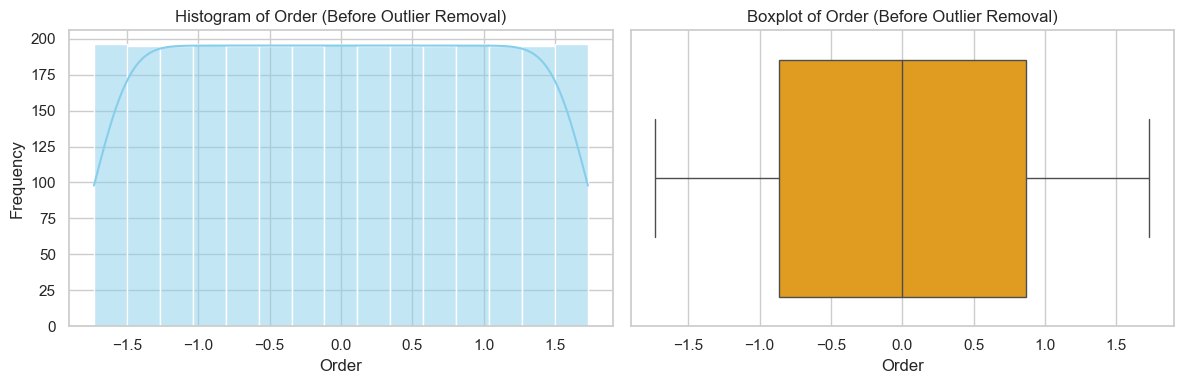

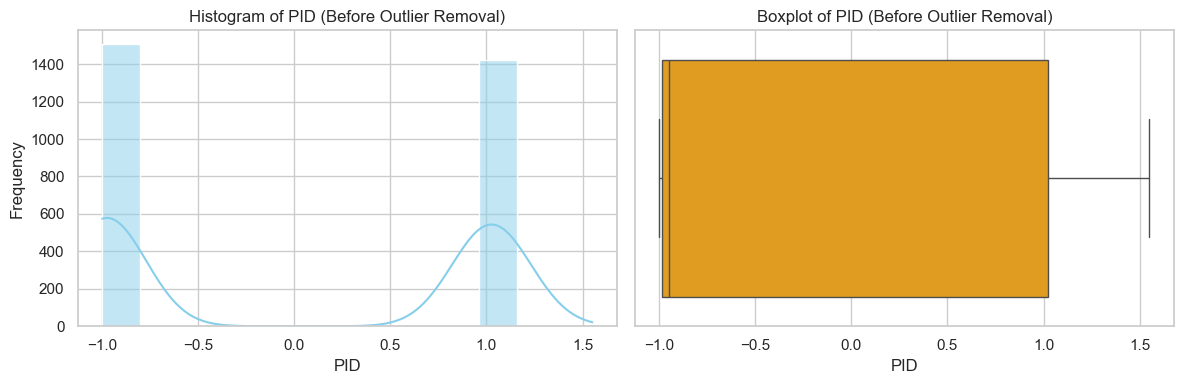

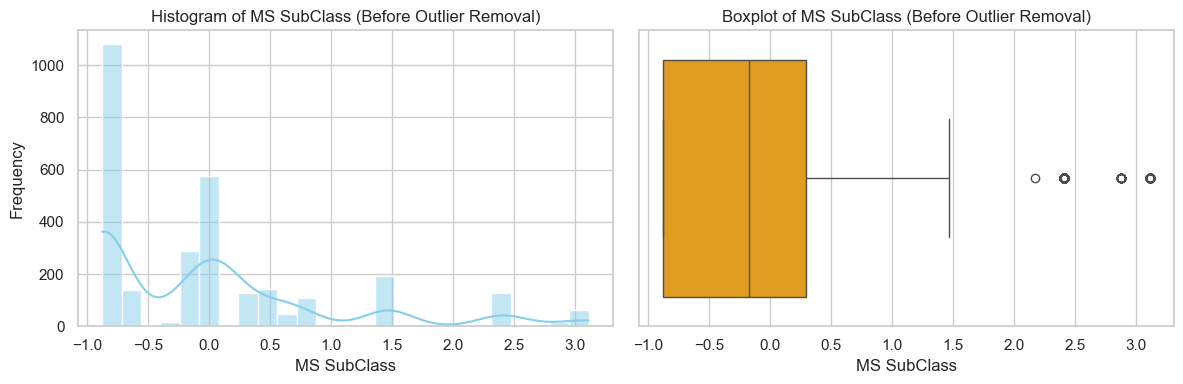

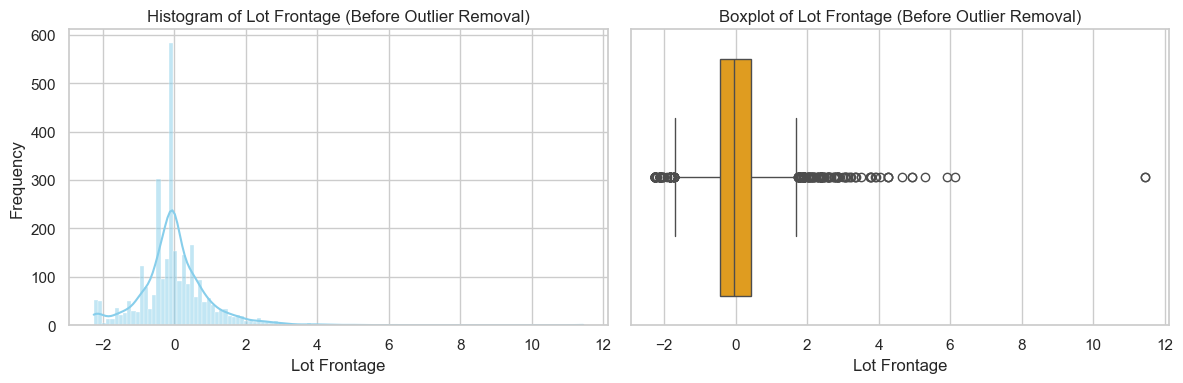

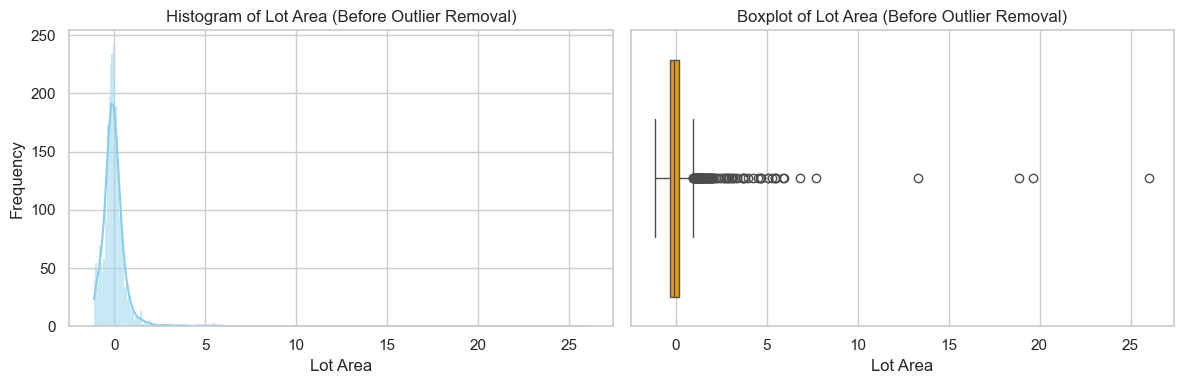

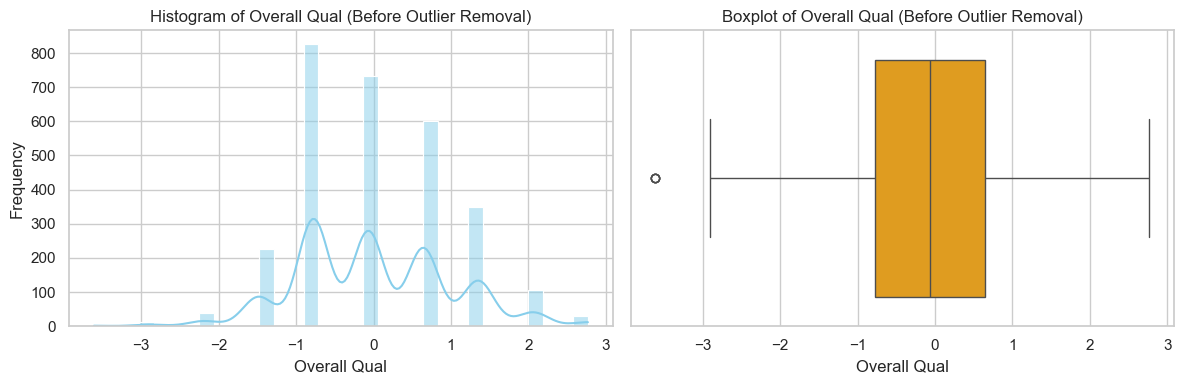

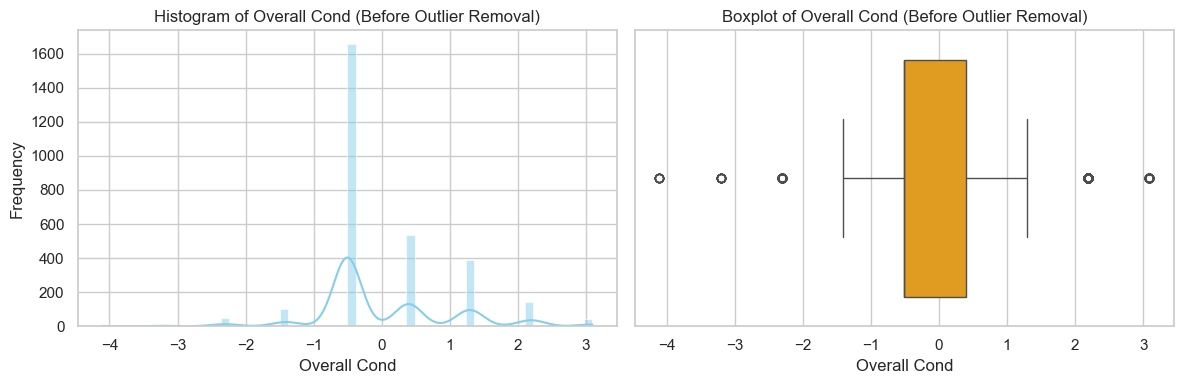

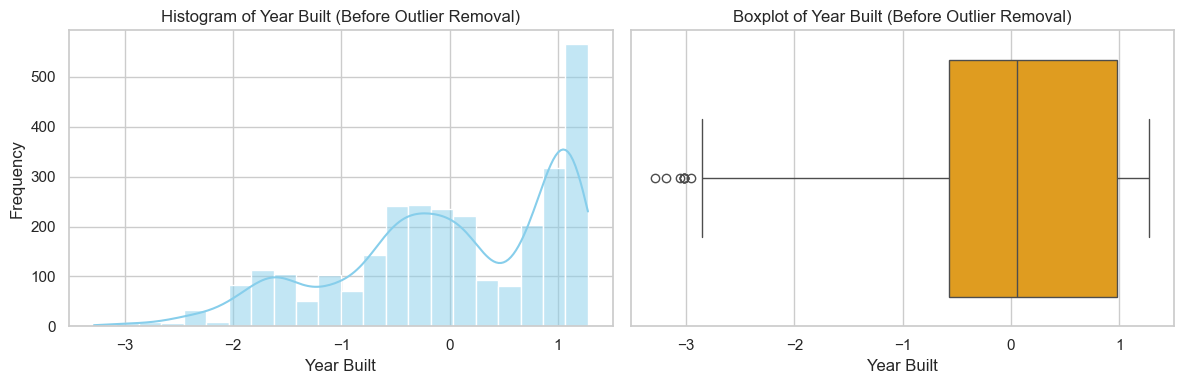

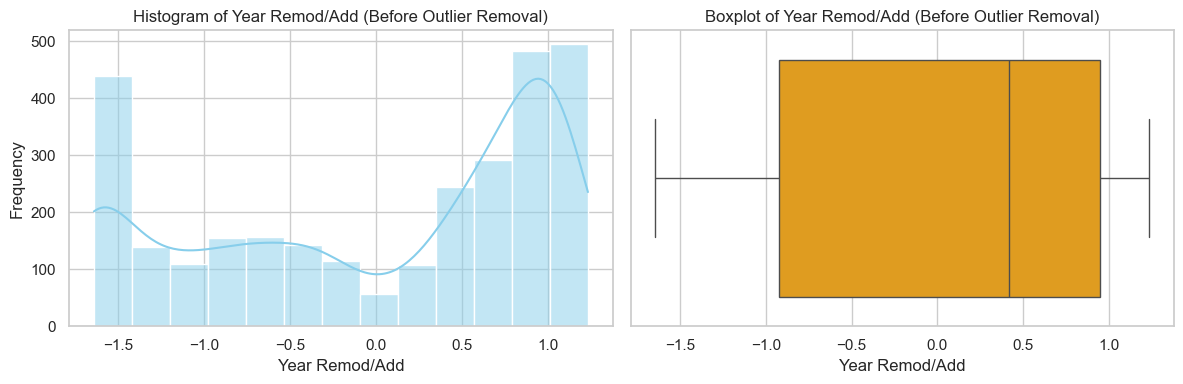

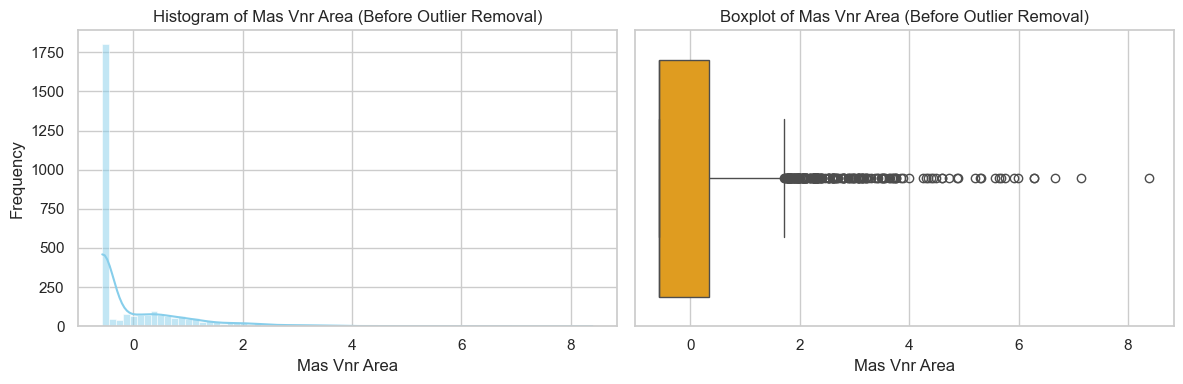

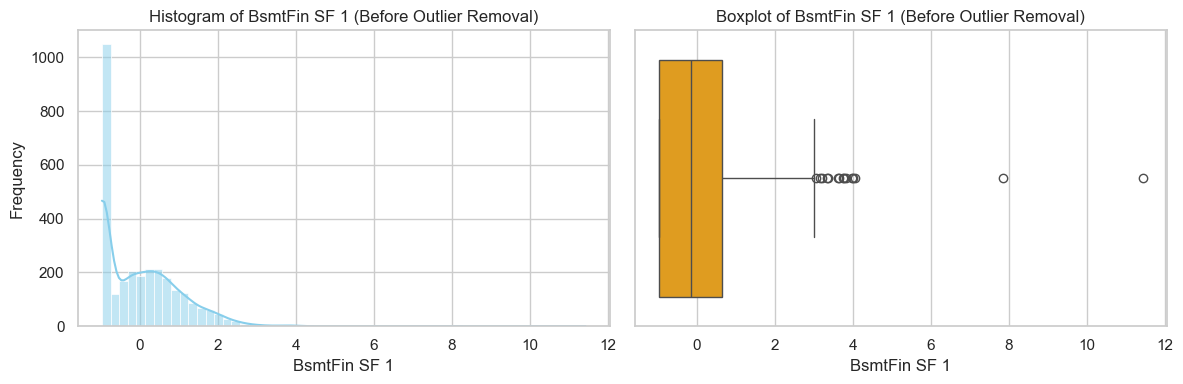

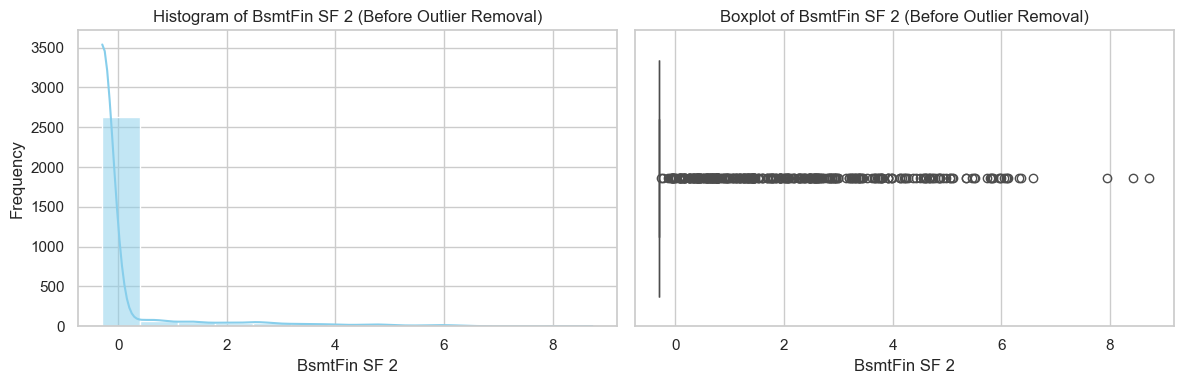

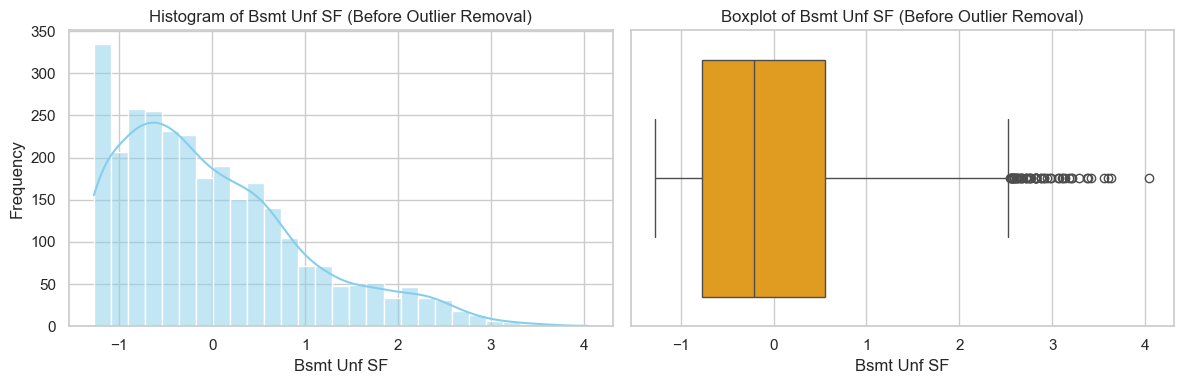

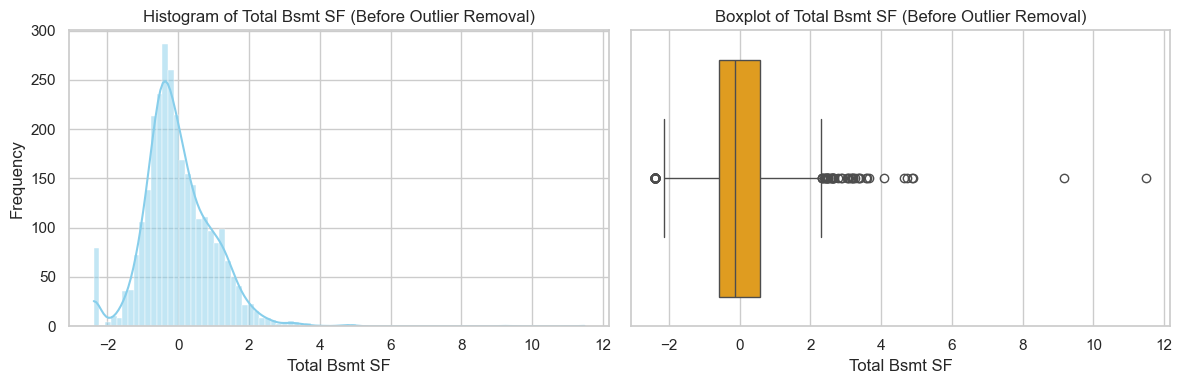

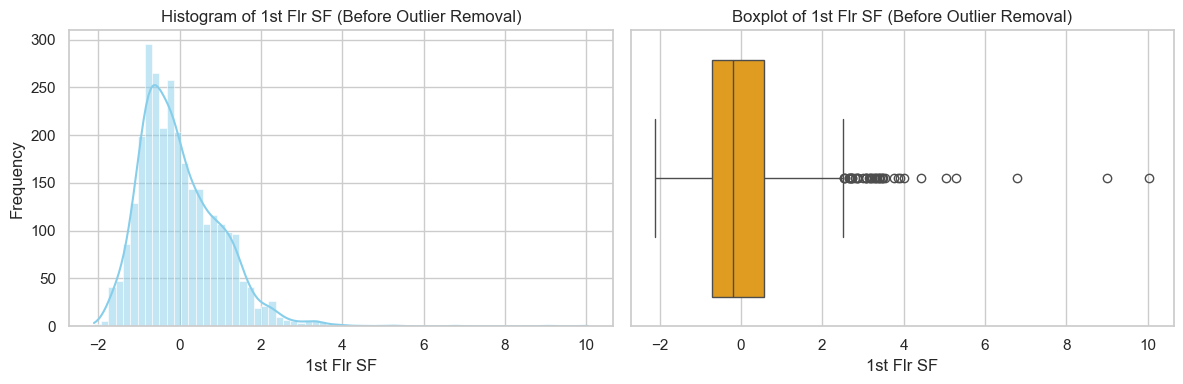

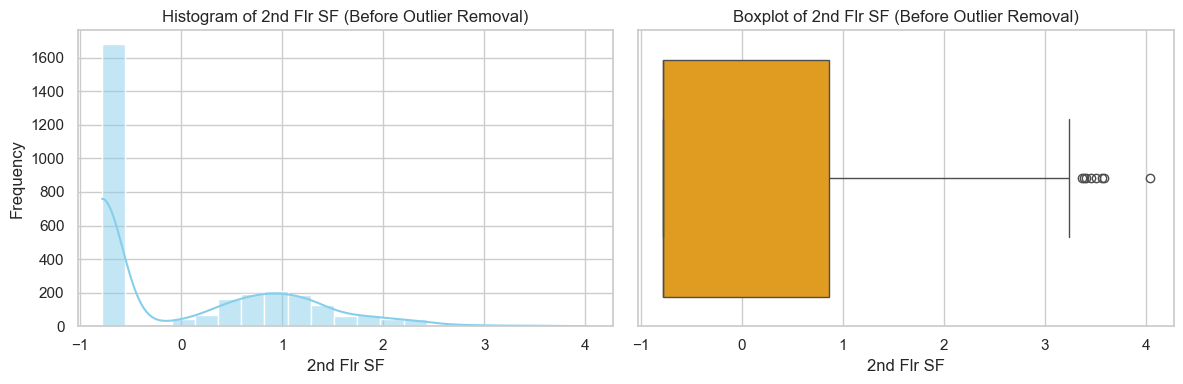

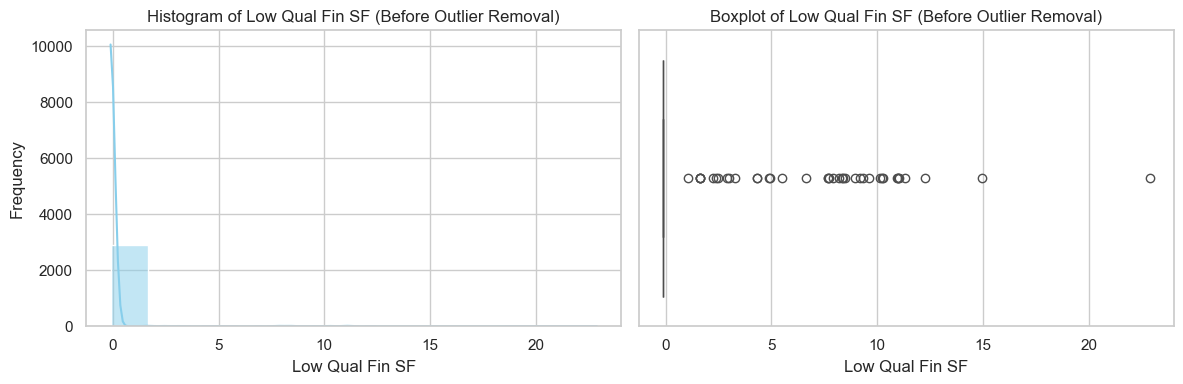

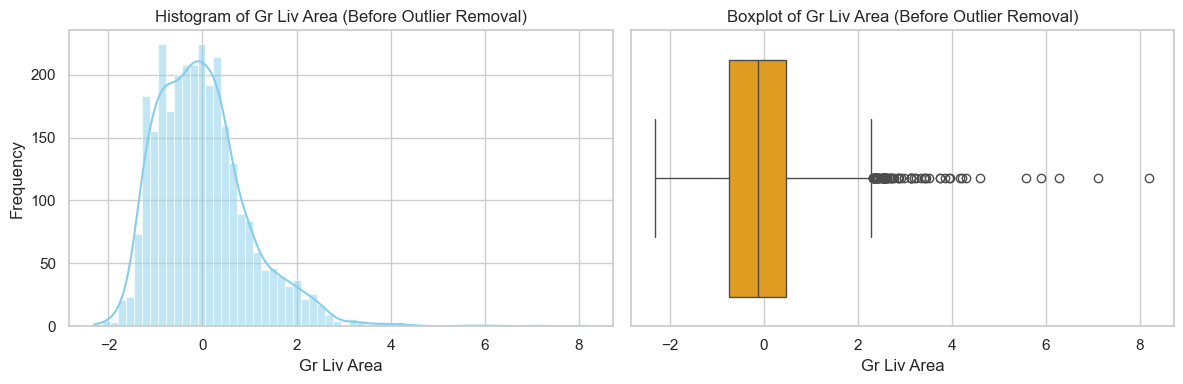

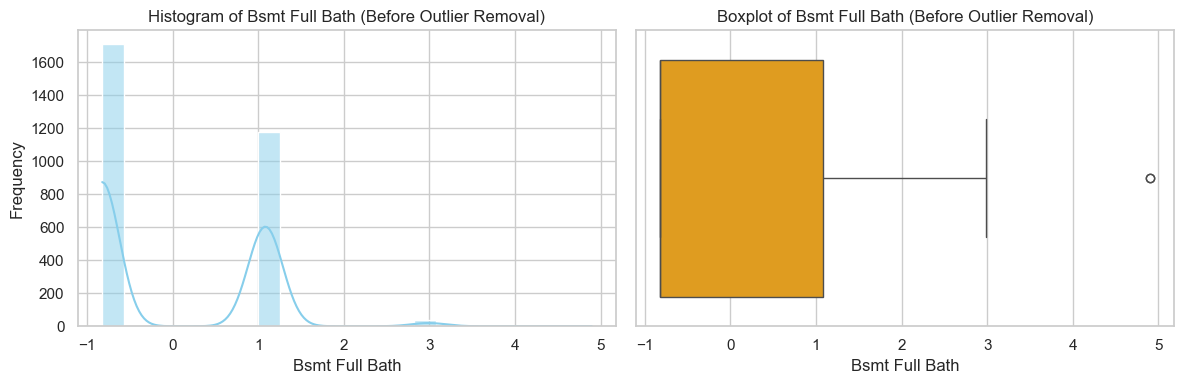

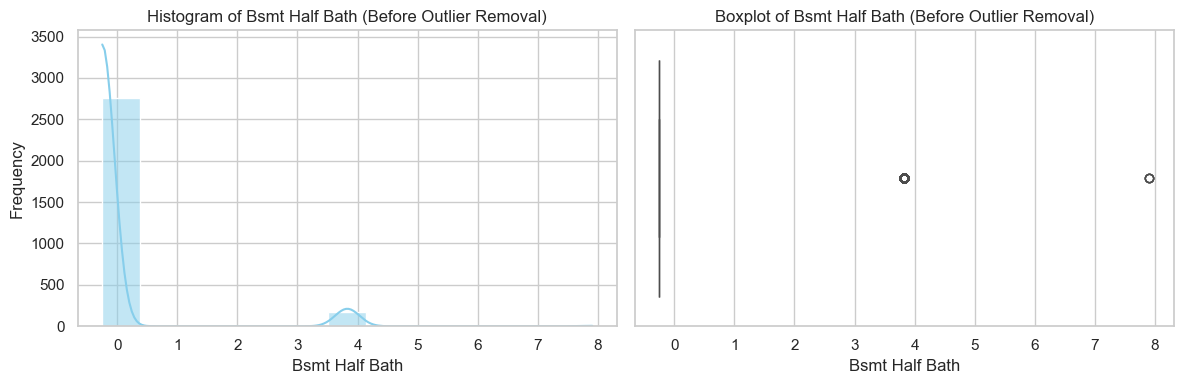

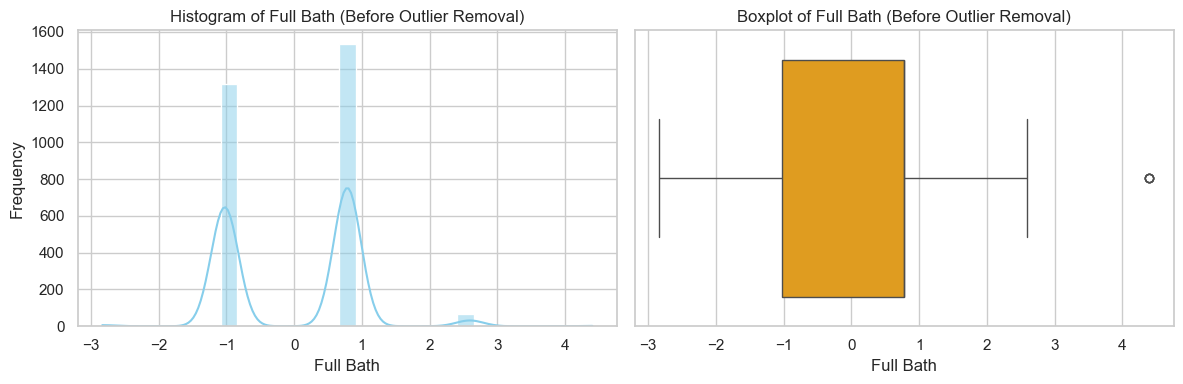

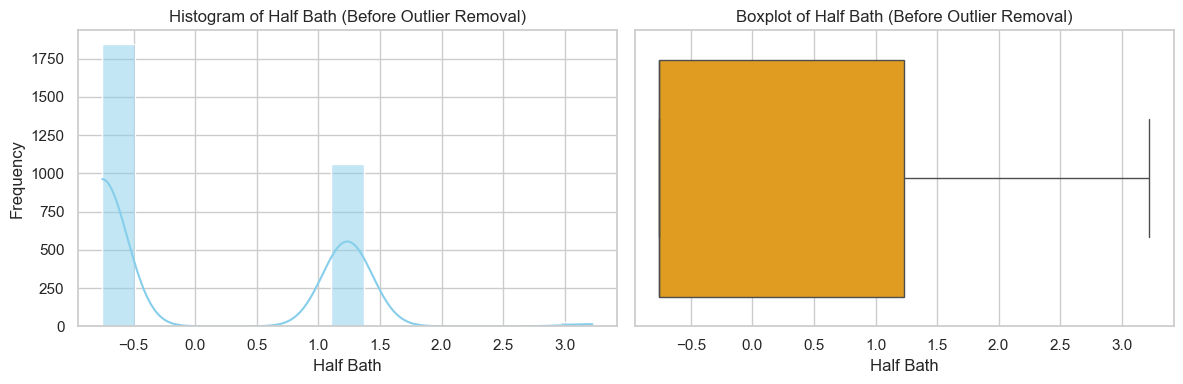

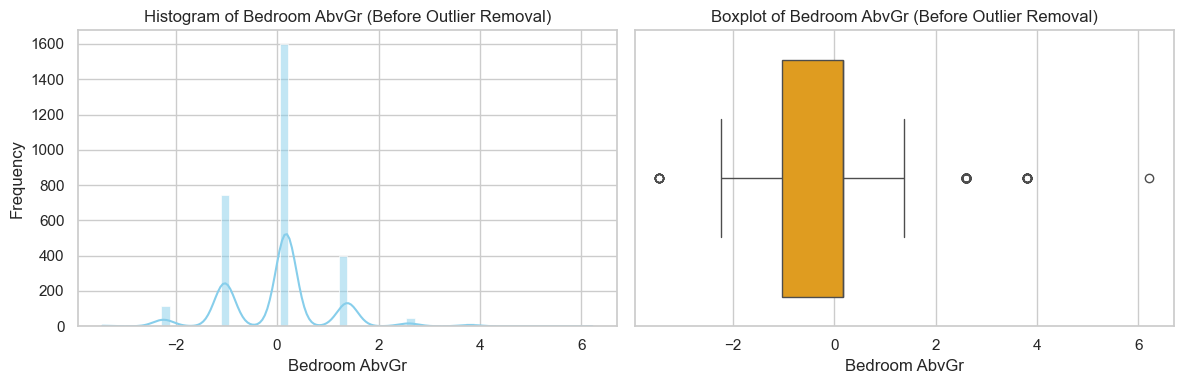

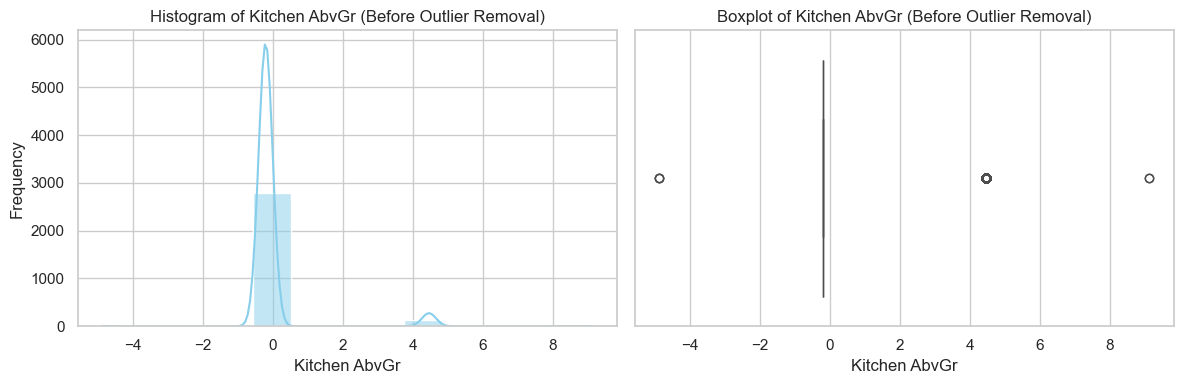

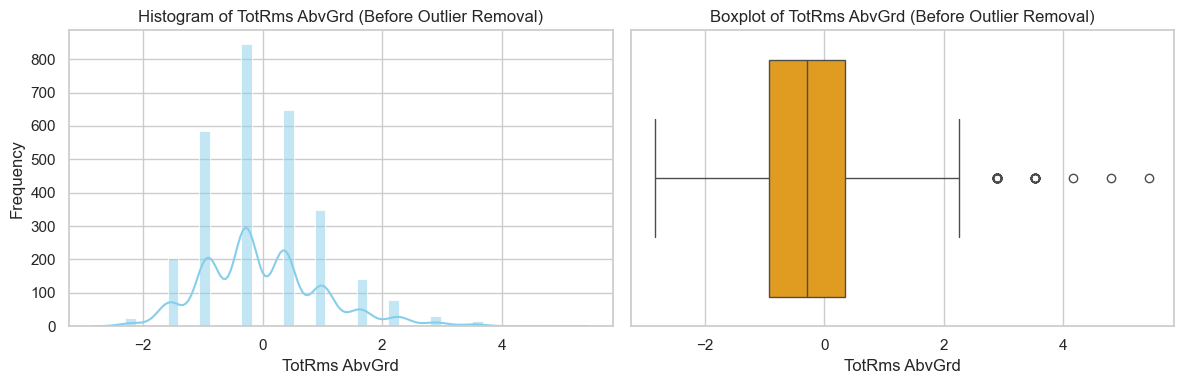

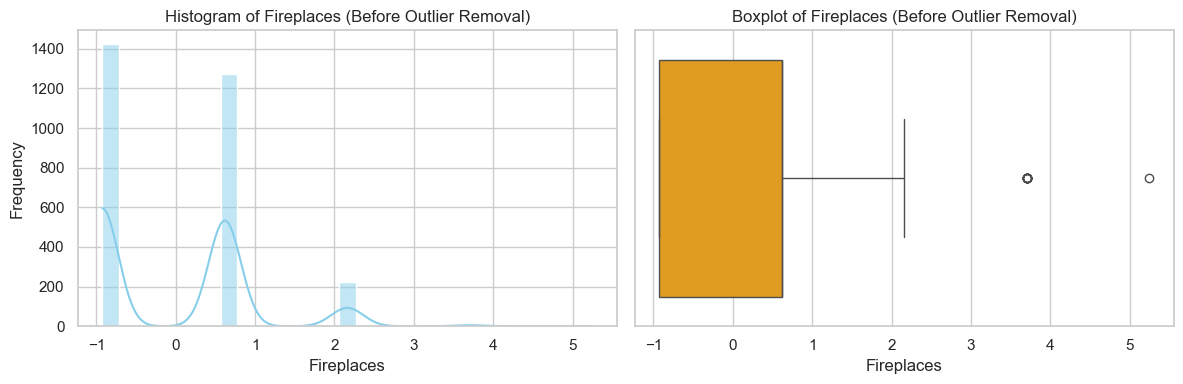

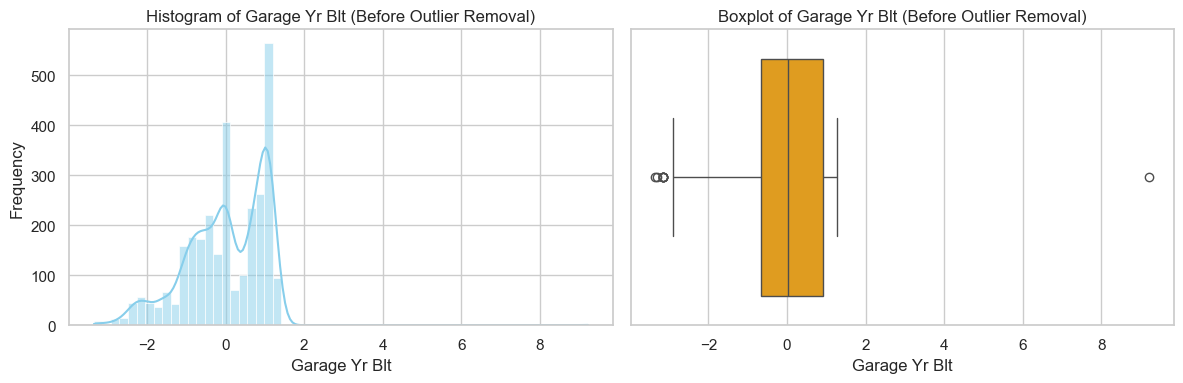

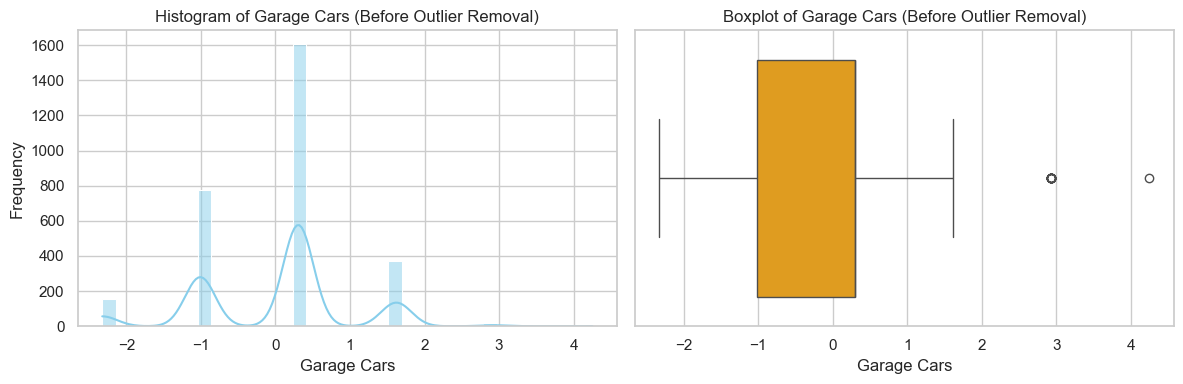

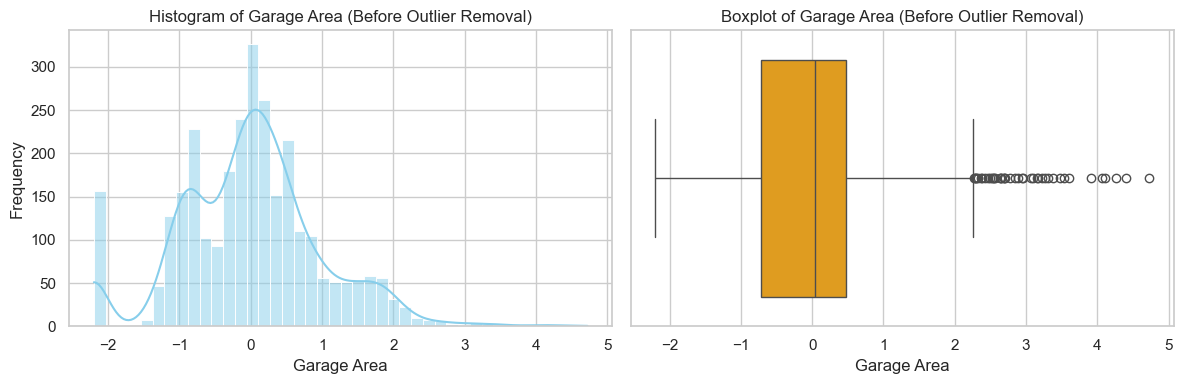

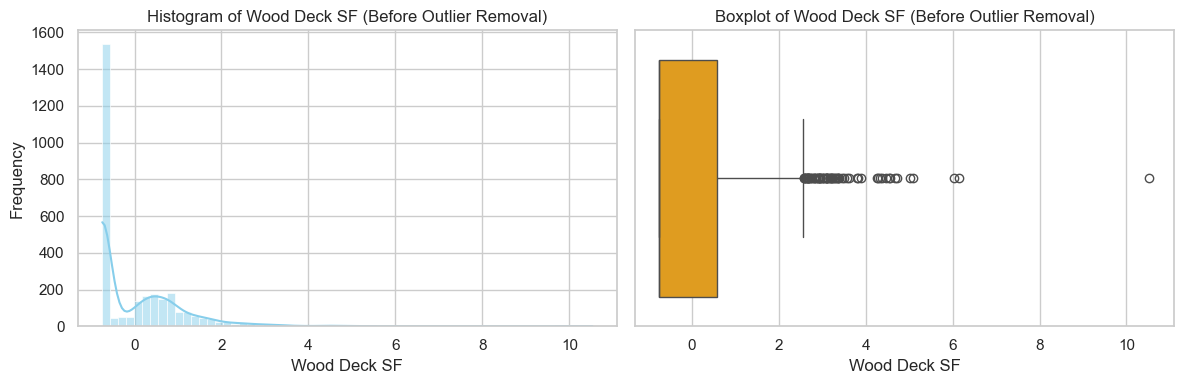

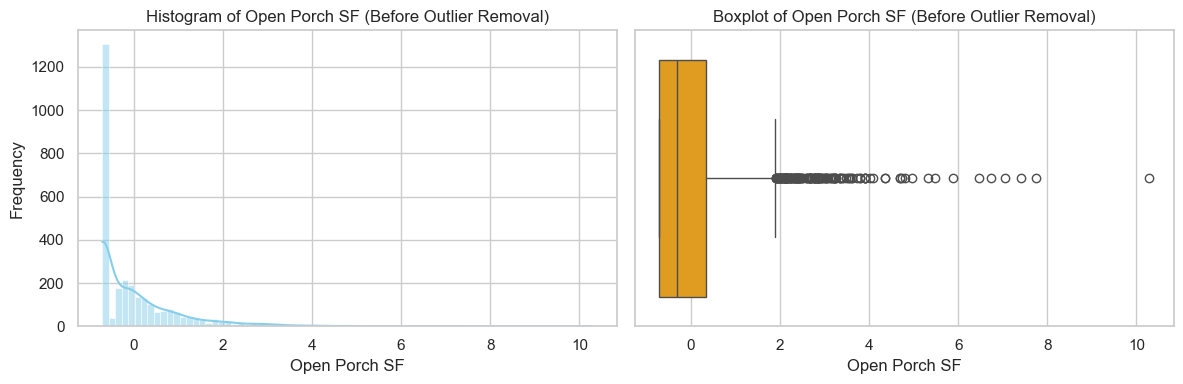

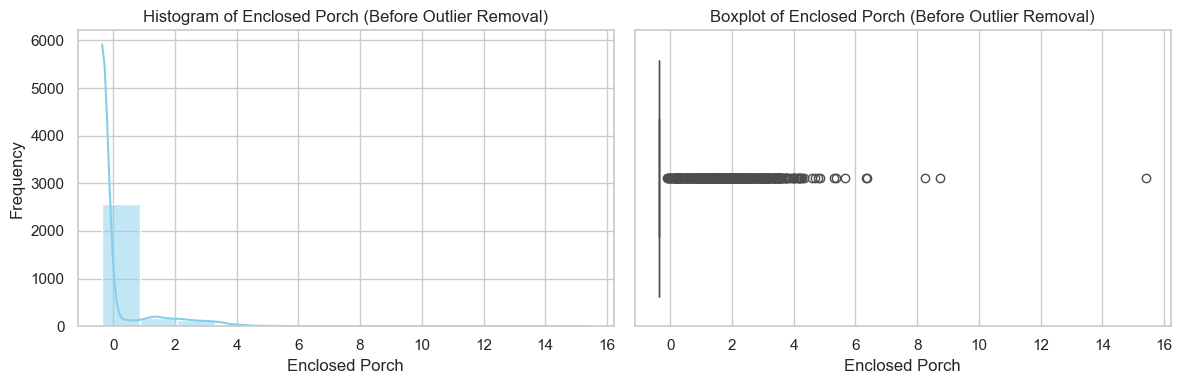

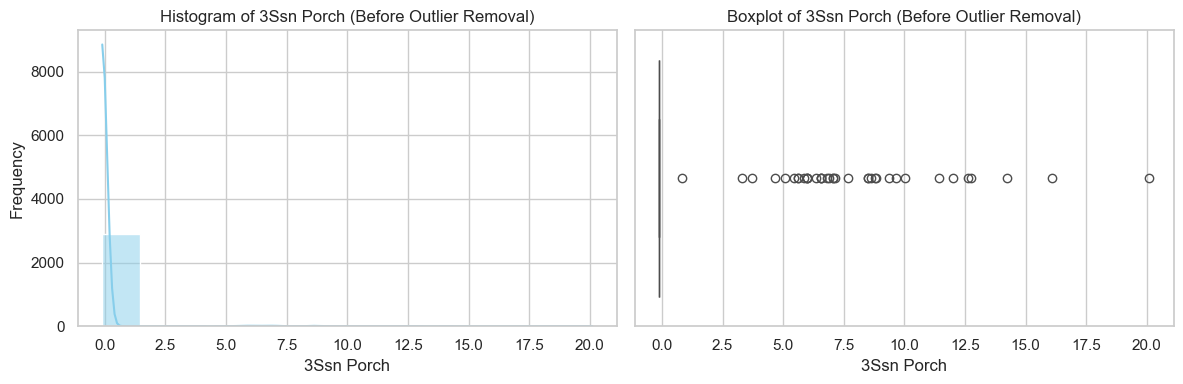

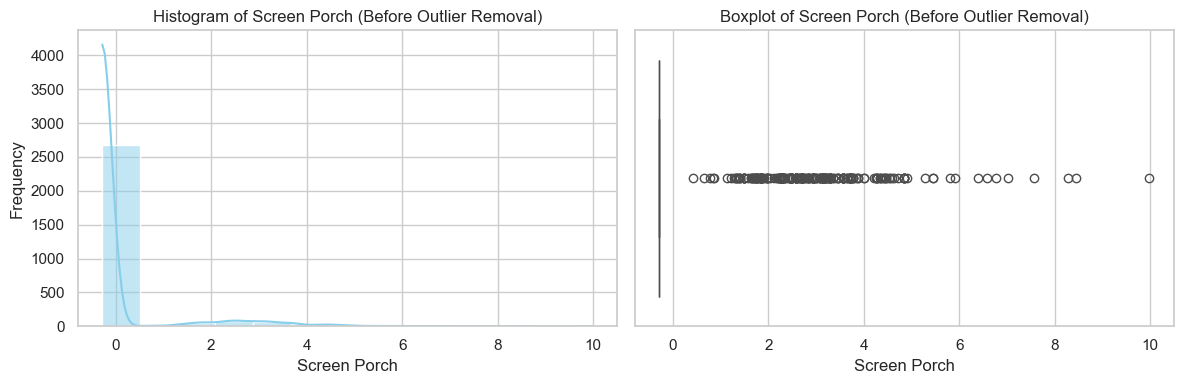

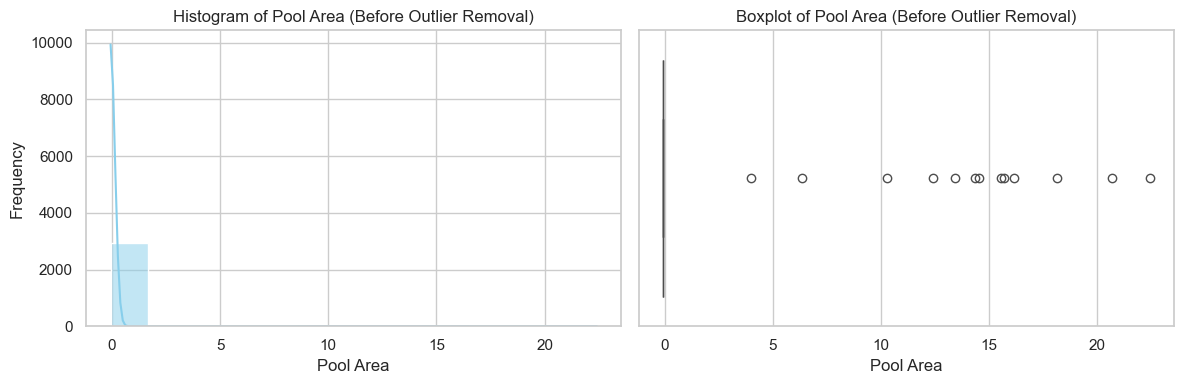

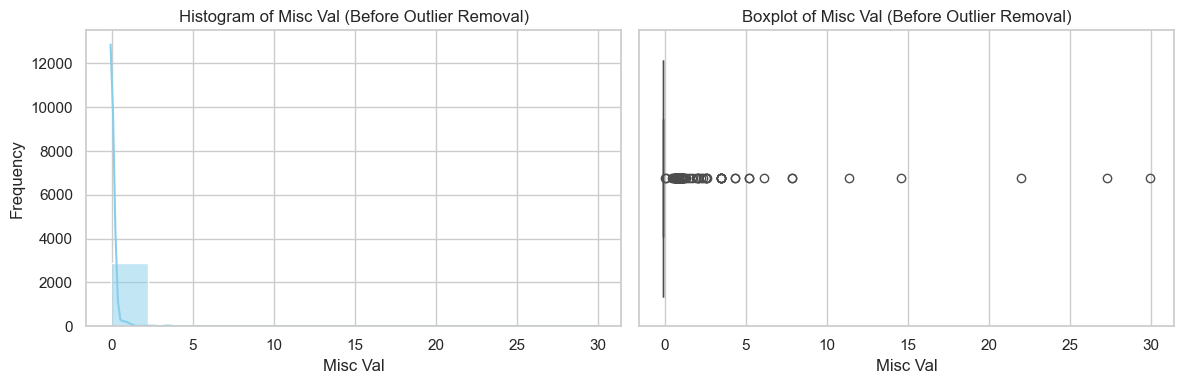

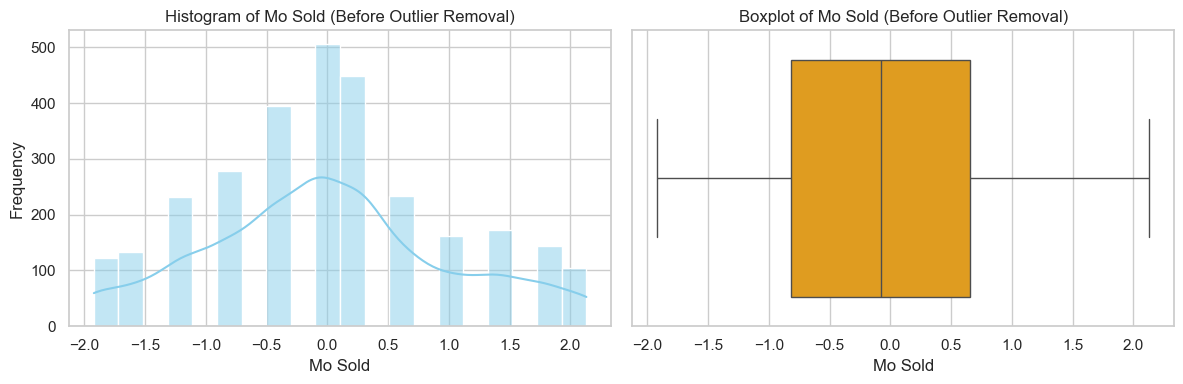

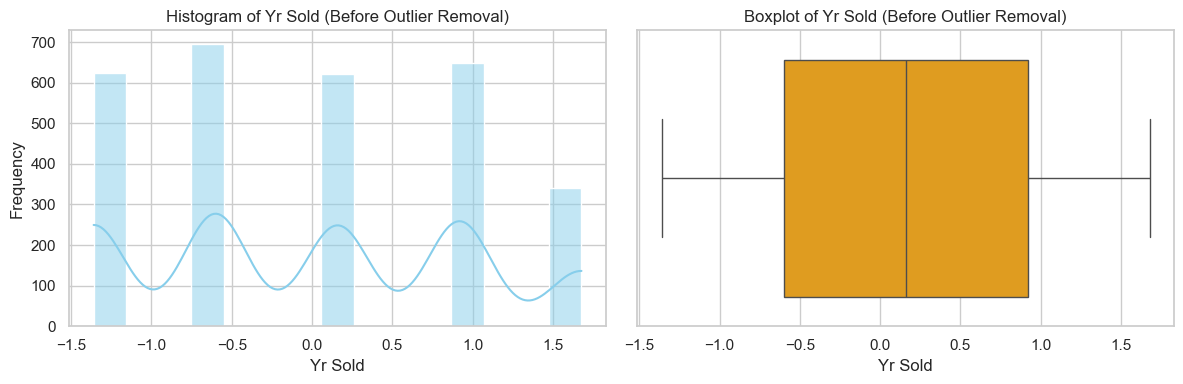

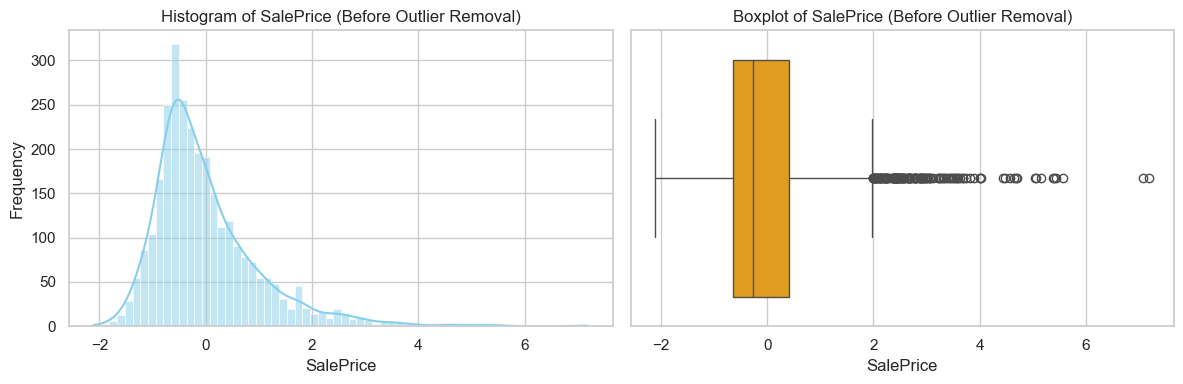

In [92]:
for col in num_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Histogram of {col} (Before Outlier Removal)")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot of {col} (Before Outlier Removal)")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


**REMOVE ALL OUTLIERS FROM NUMERICAL COLUMNS USING IQR**

In [76]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column and remove outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Confirm shape after removal
print(f"Data shape after removing all numerical outliers: {df.shape}")

Data shape after removing all numerical outliers: (1058, 252)


In [77]:
df

Order       PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
4    -1.726731 -0.992903     0.061285      0.233563  0.467348     -0.776079   
5    -1.725548 -0.992903     0.061285      0.421155 -0.021567     -0.067254   
8    -1.722001 -0.992686     1.468720     -1.407874 -0.604026      1.350396   
9    -1.720819 -0.992601     0.061285     -0.423012 -0.336087      0.641571   
10   -1.719637 -0.992596     0.061285      0.280461 -0.018775     -0.067254   
...        ...       ...          ...           ...       ...           ...   
2900  1.697173  1.070556    -0.877005      1.218425  0.440439      1.350396   
2905  1.703085  1.106201     1.468720     -1.736162 -0.716862     -0.067254   
2911  1.710179  1.106320    -0.877005     -0.516809  0.003056     -0.776079   
2925  1.726731  1.106582     0.530430     -1.501671 -0.280621     -0.067254   
2929  1.731460  1.111225     0.061285      0.233563 -0.066118      0.641571   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  \
4        -0.506718    0.848000        0.658466     -0.566039  ...   
5         0.393091    0.881068        0.658466     -0.454060  ...   
8        -0.506718    0.781863        0.562574     -0.566039  ...   
9        -0.506718    0.914137        0.706412     -0.566039  ...   
10       -0.506718    0.715726        0.466681     -0.566039  ...   
...            ...         ...             ...           ...  ...   
2900     -0.506718    1.112548        1.042035      0.542558  ...   
2905     -0.506718    0.881068        0.658466      0.083442  ...   
2911      1.292900   -0.110988        0.898197     -0.566039  ...   
2925      0.393091    0.418109       -0.012780     -0.566039  ...   
2929     -0.506718    0.715726        0.466681     -0.039736  ...   

      Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
4               False          False          False          False   
5               False          False          False          False   
8               False          False          False          False   
9               False          False          False          False   
10              False          False          False          False   
...               ...            ...            ...            ...   
2900            False           True          False          False   
2905            False          False          False          False   
2911            False          False          False          False   
2925            False          False          False          False   
2929            False          False          False          False   

      Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
4              True                   False                  False   
5              True                   False                  False   
8              True                   False                  False   
9              True                   False                  False   
10             True                   False                  False   
...             ...                     ...                    ...   
2900          False                   False                  False   
2905           True                   False                  False   
2911           True                   False                  False   
2925           True                   False                  False   
2929           True                   False                  False   

      Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
4                     False                   True                   False  
5                     False                   True                   False  
8                     False                   True                   False  
9                     False                   True                   False  
10                    False                   True                   False  
...                     ...                    ...                     ...  
2900      

**HISTOGRAMS & BOXPLOTS FOR ALL NUMERICAL COLUMNS AFTER OUTLIER REMOVAL**

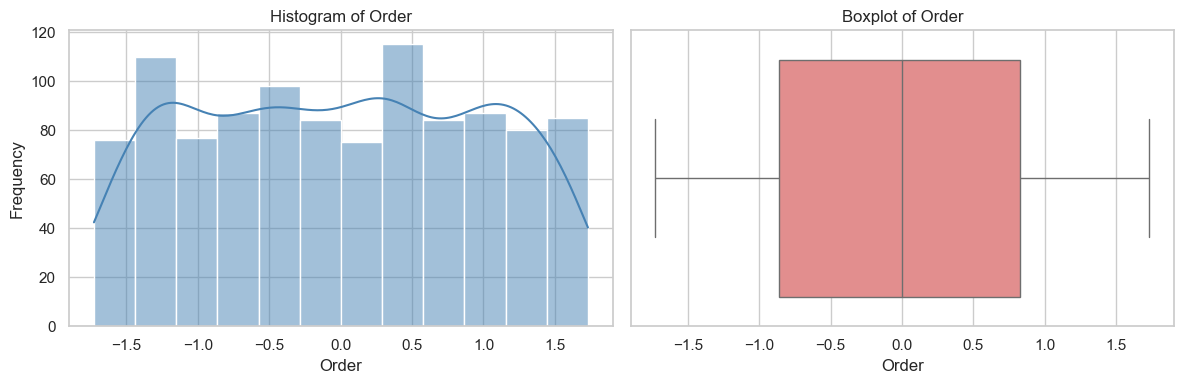

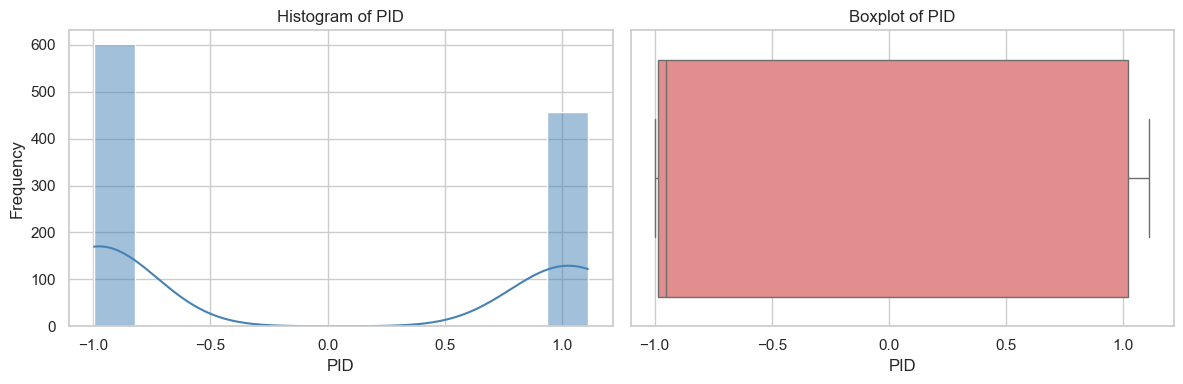

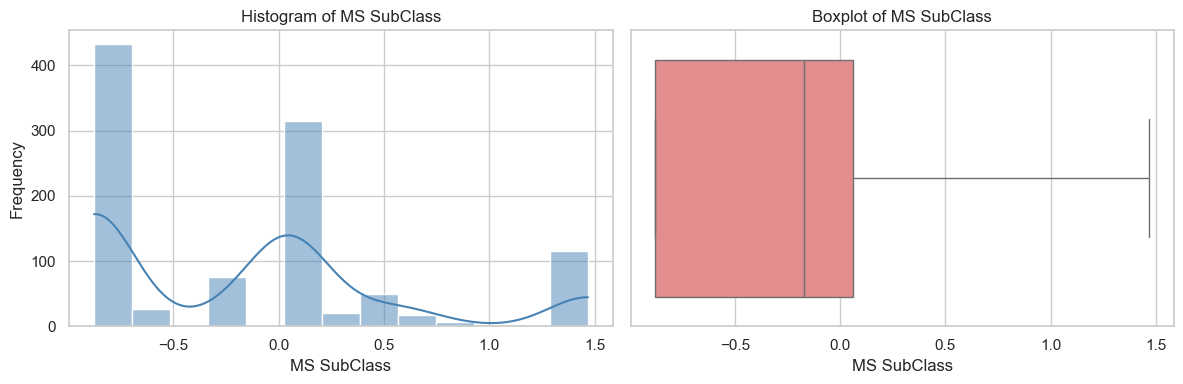

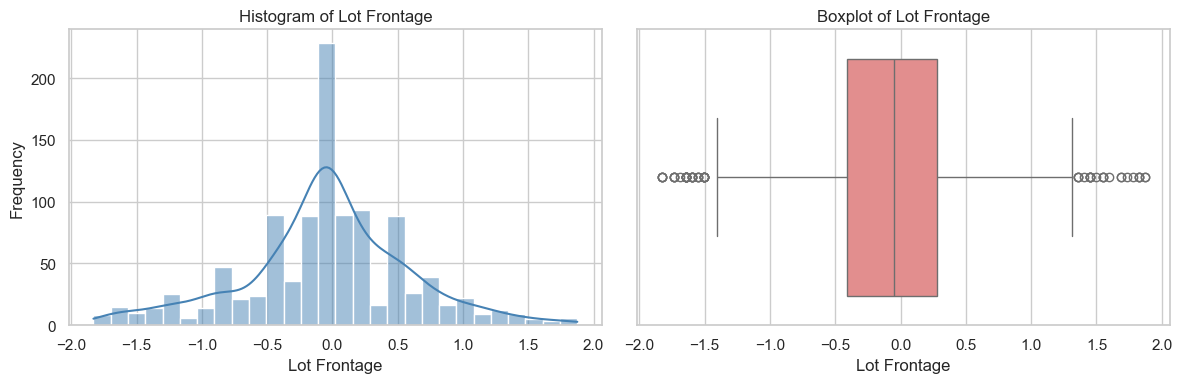

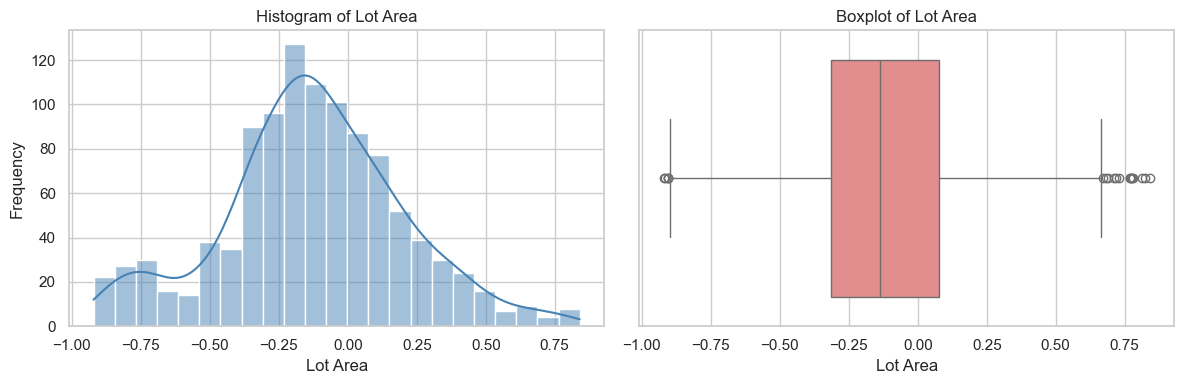

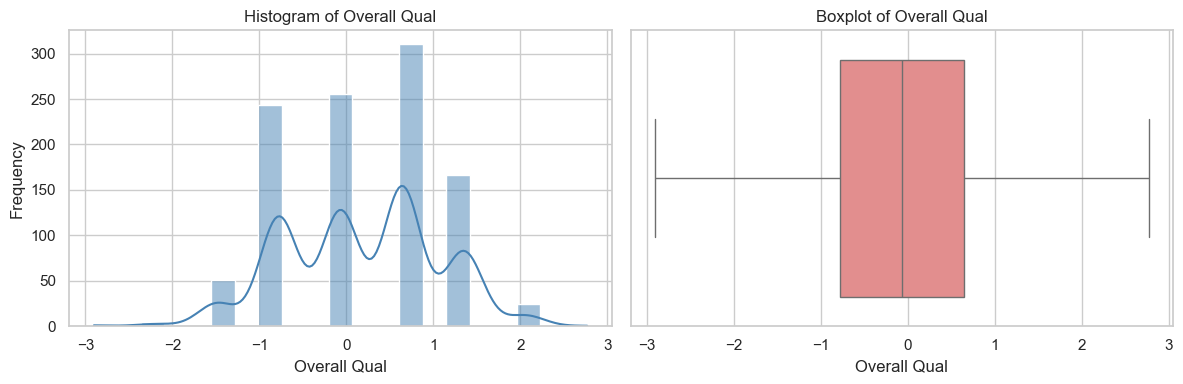

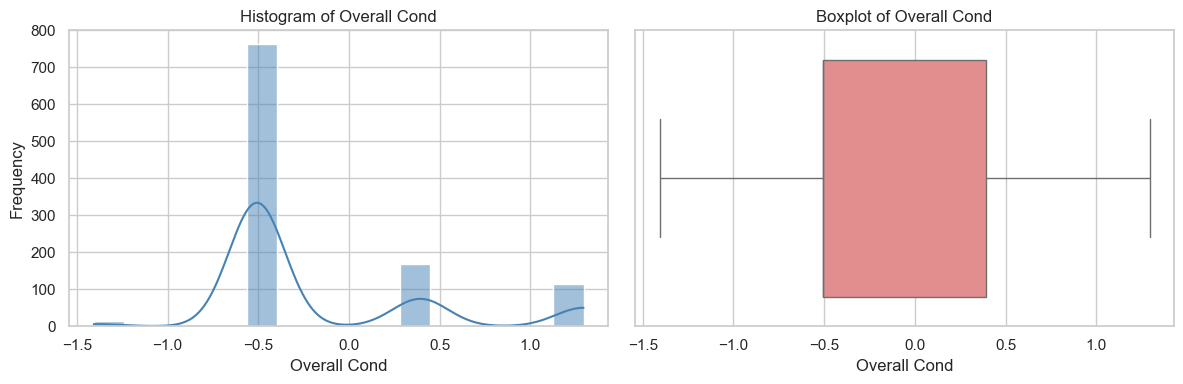

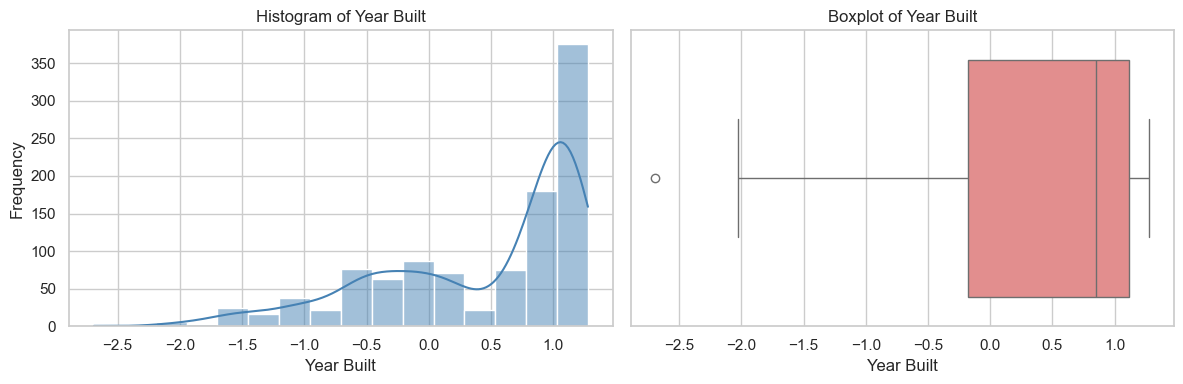

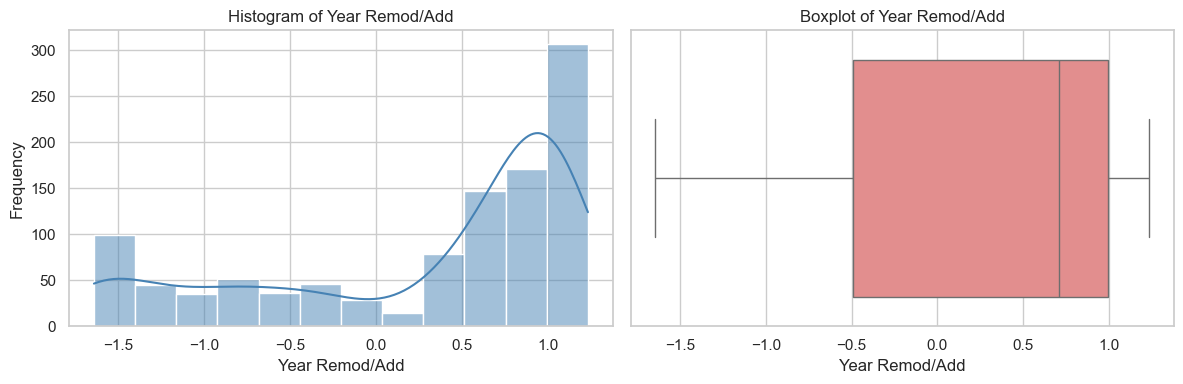

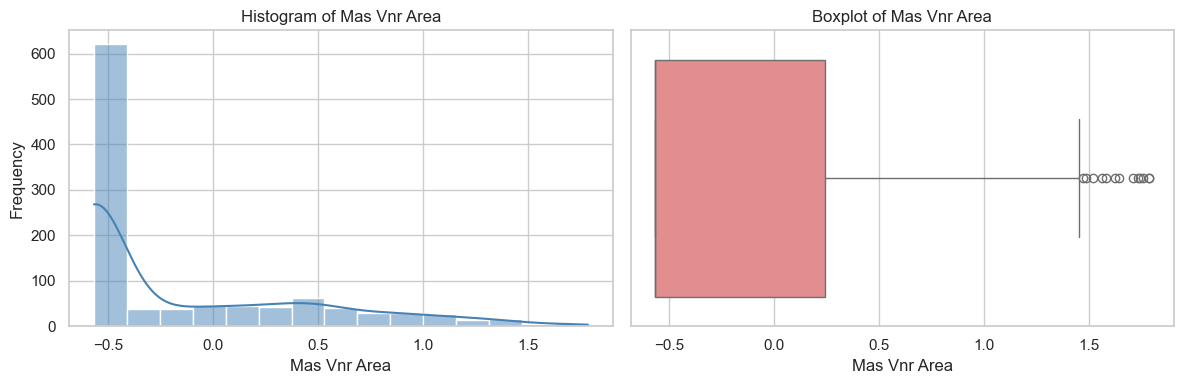

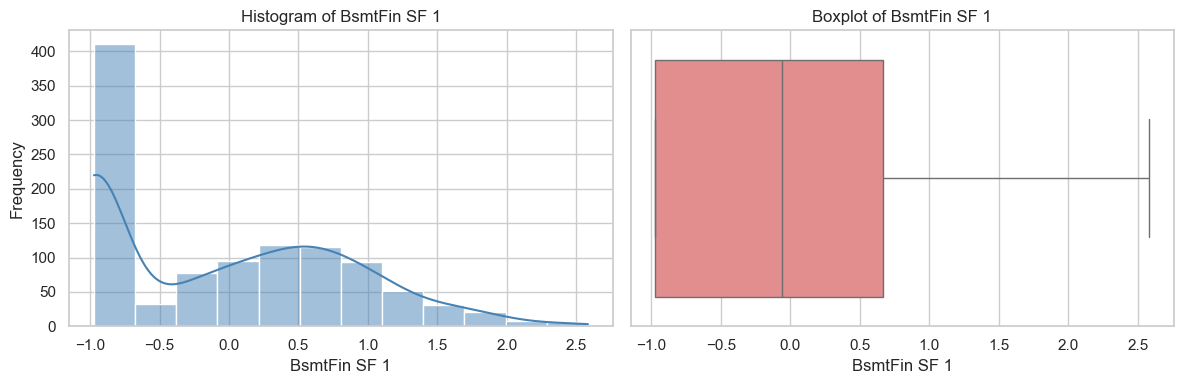

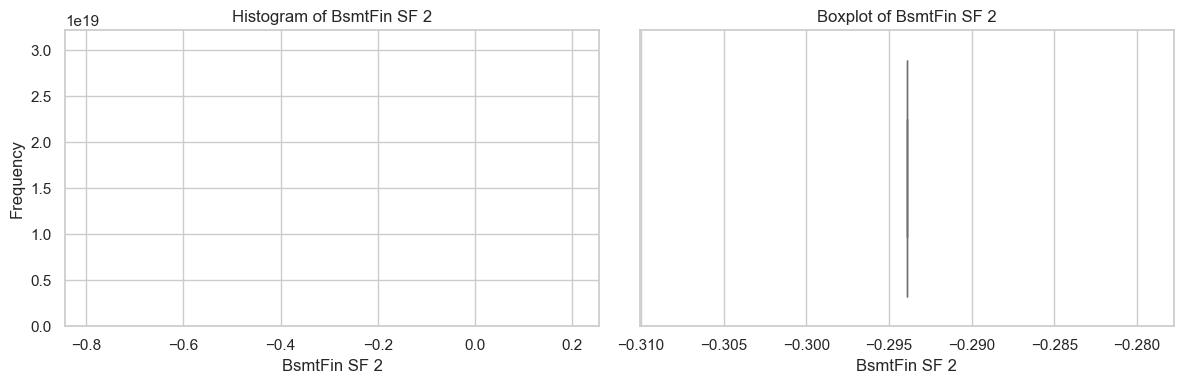

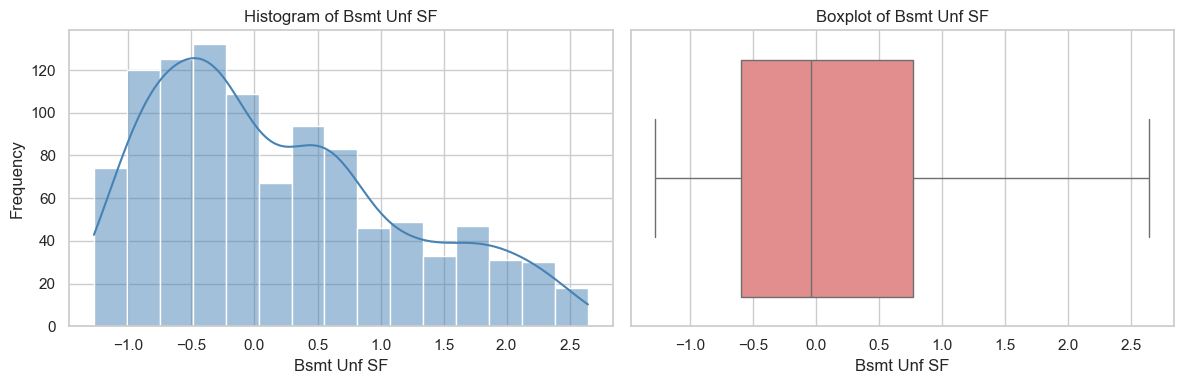

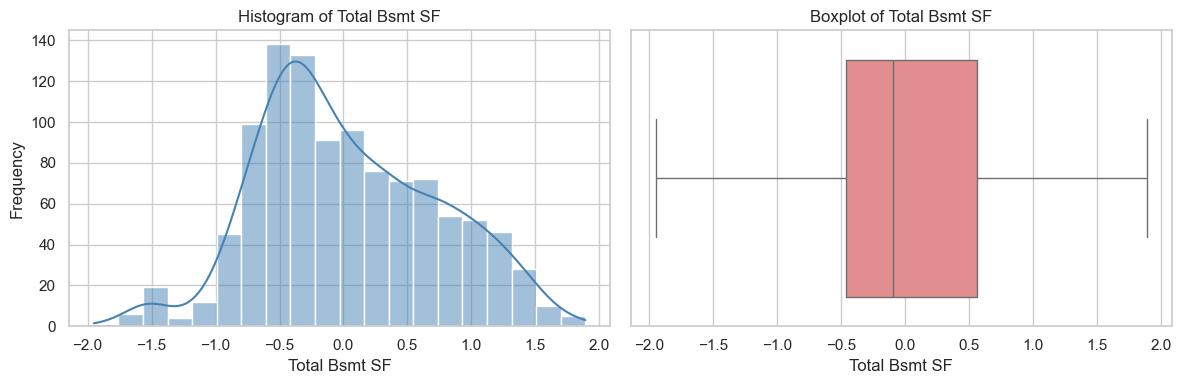

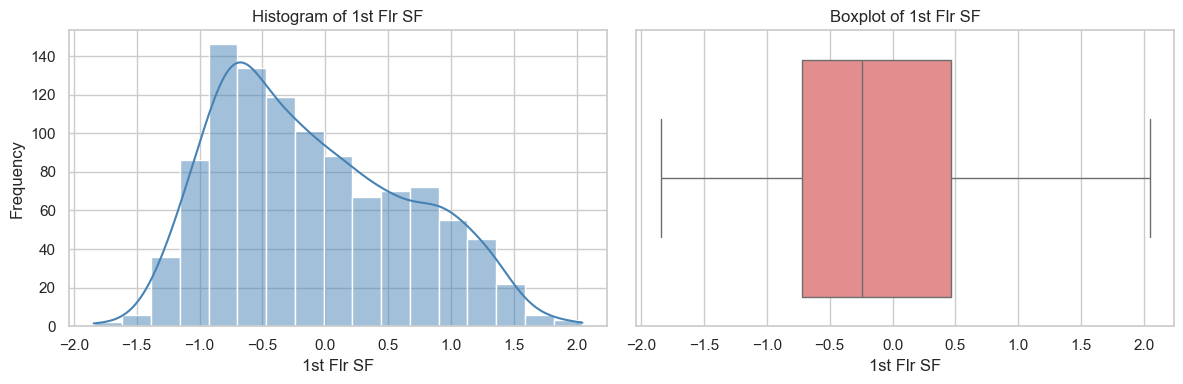

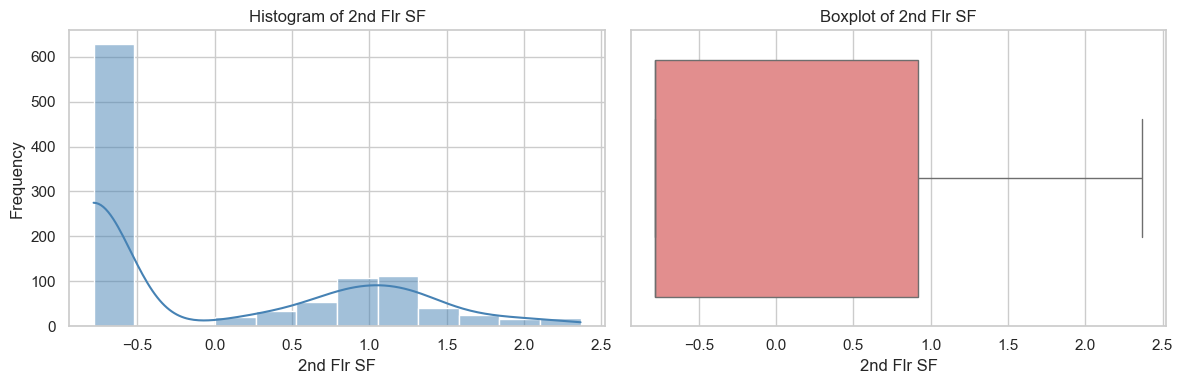

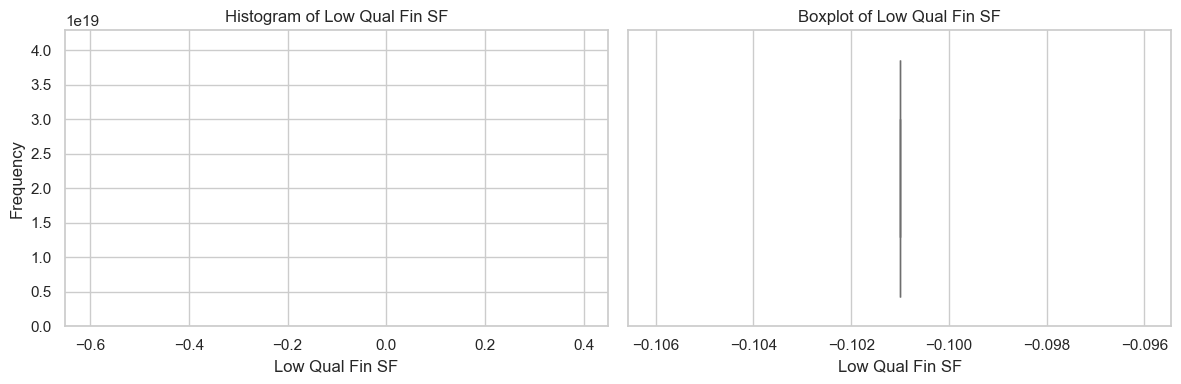

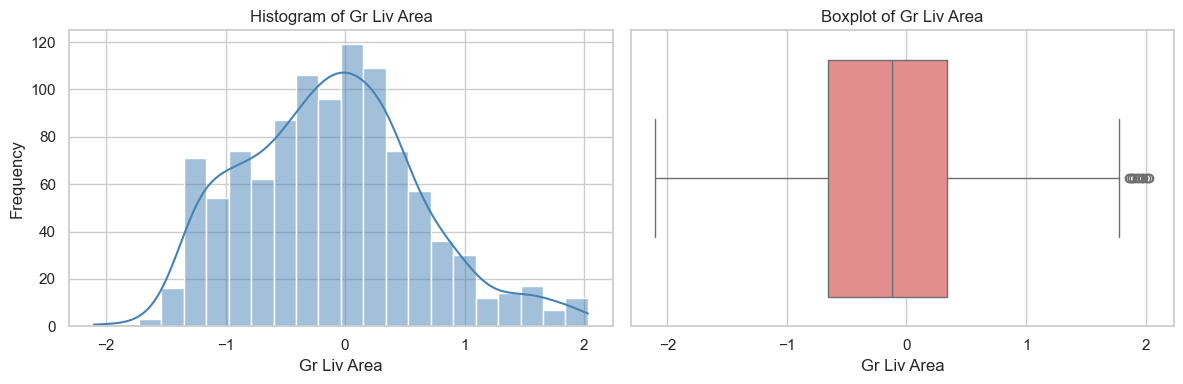

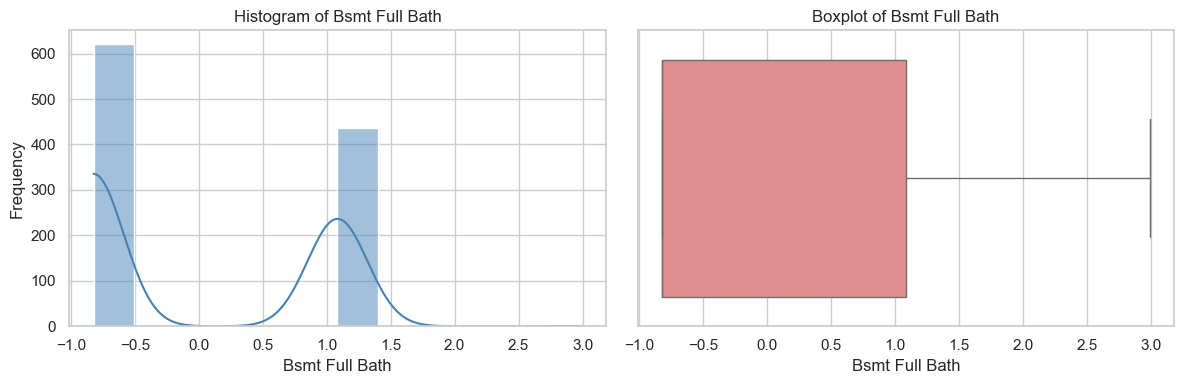

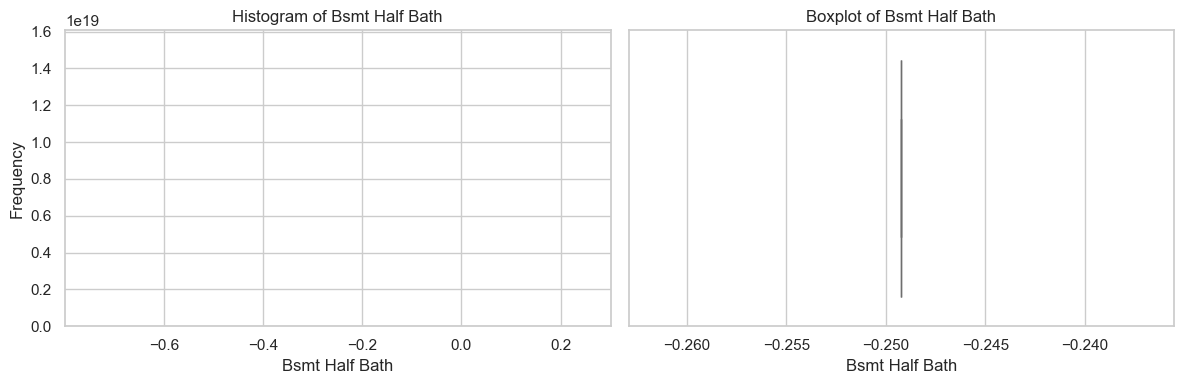

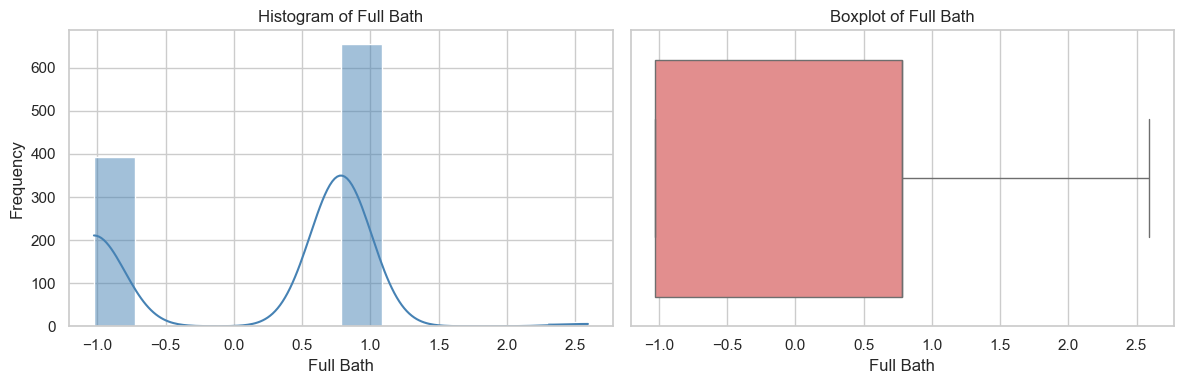

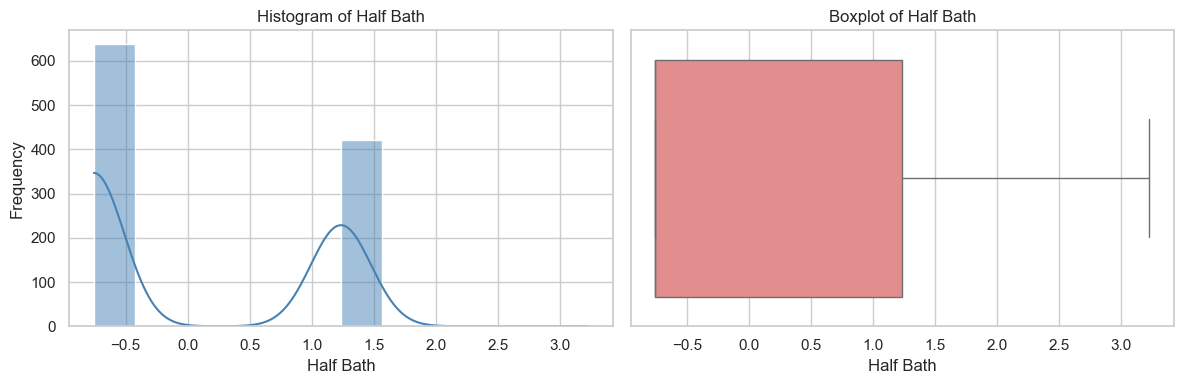

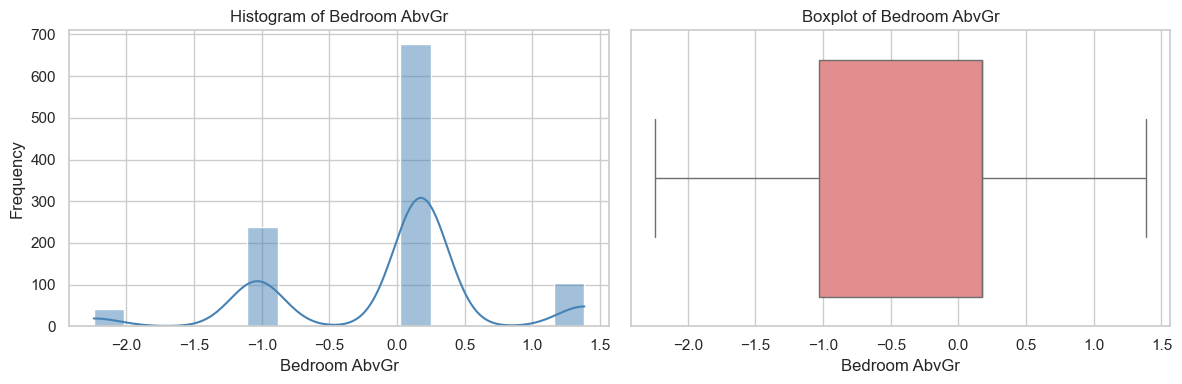

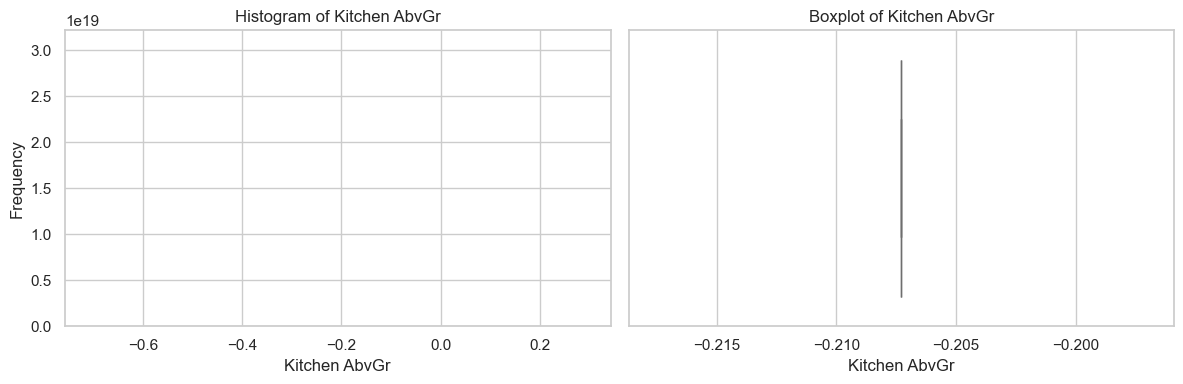

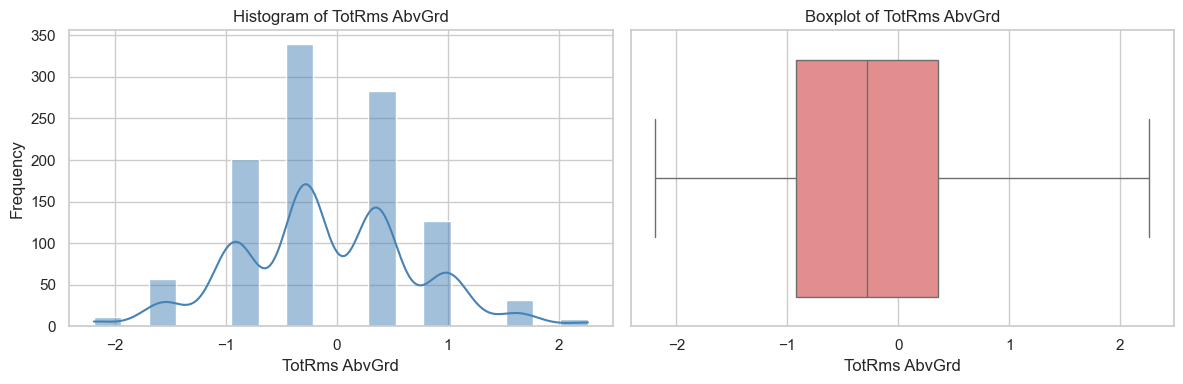

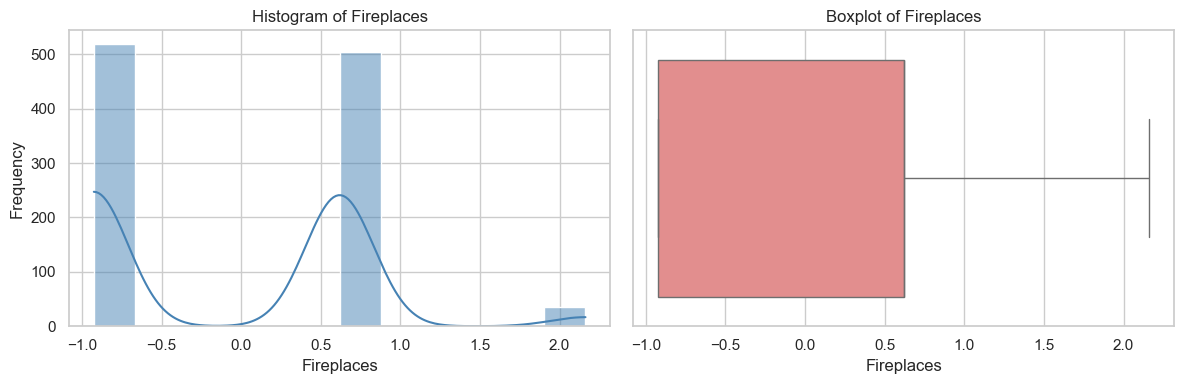

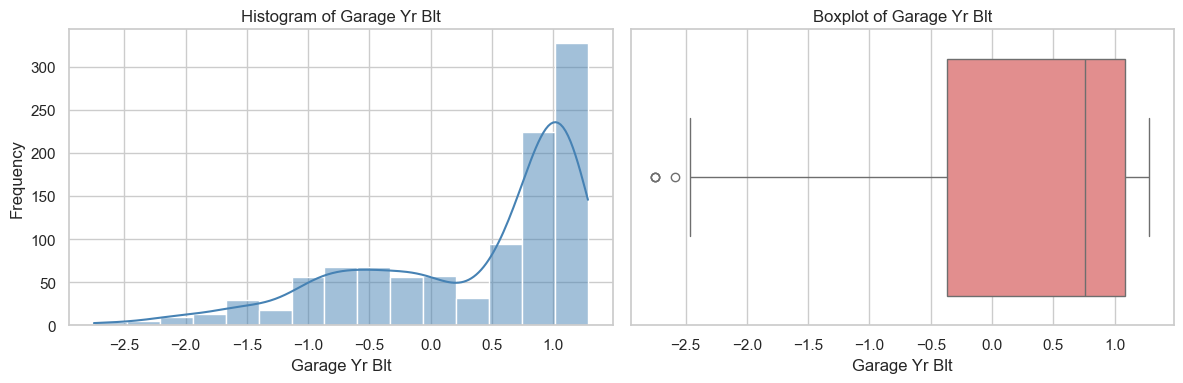

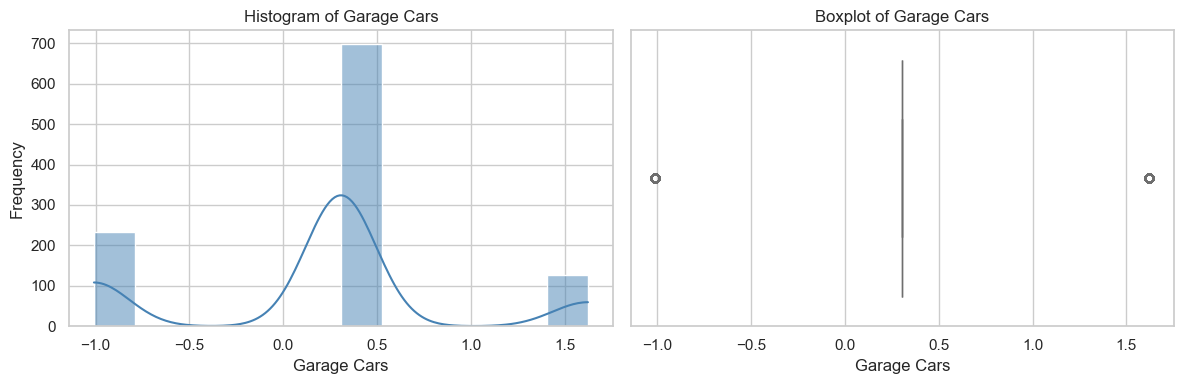

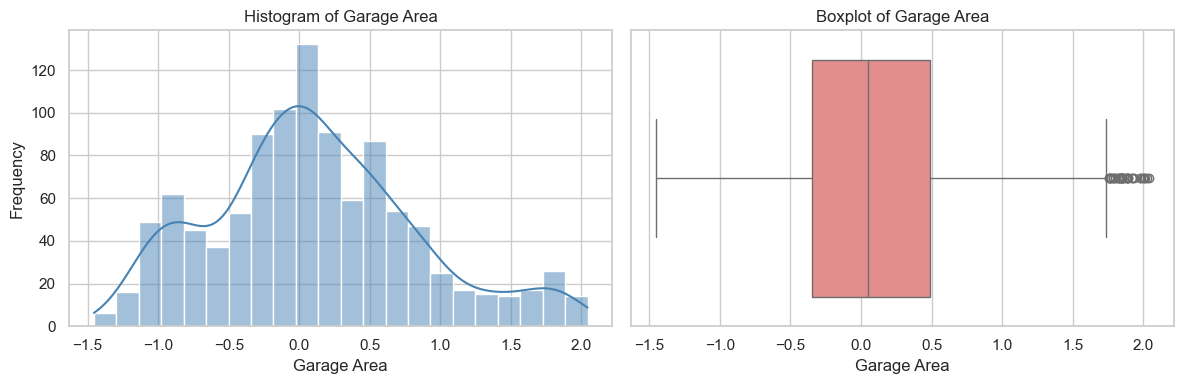

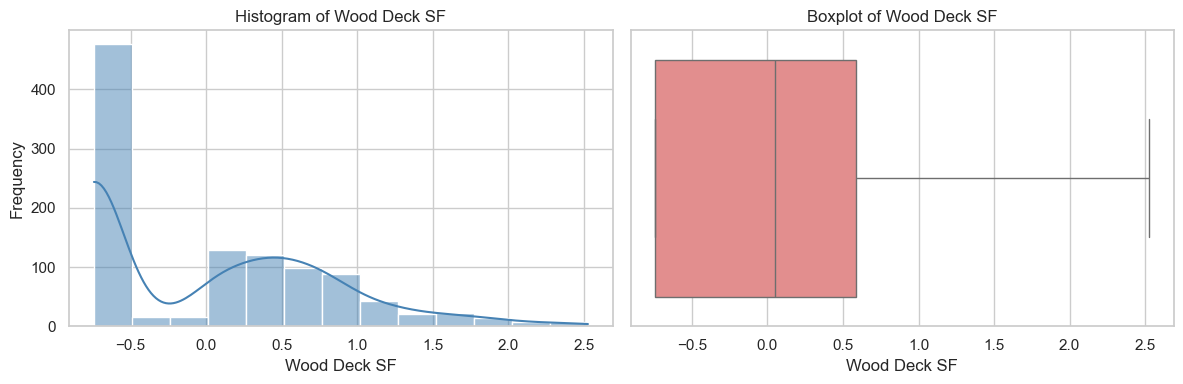

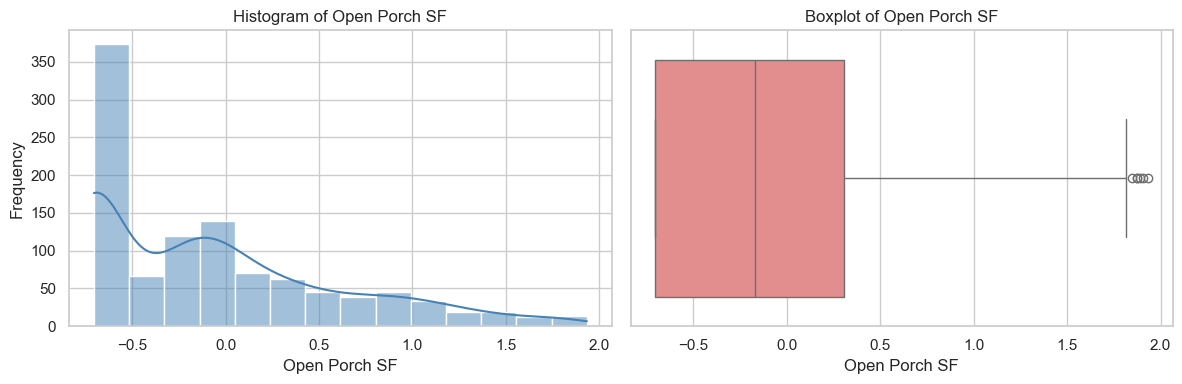

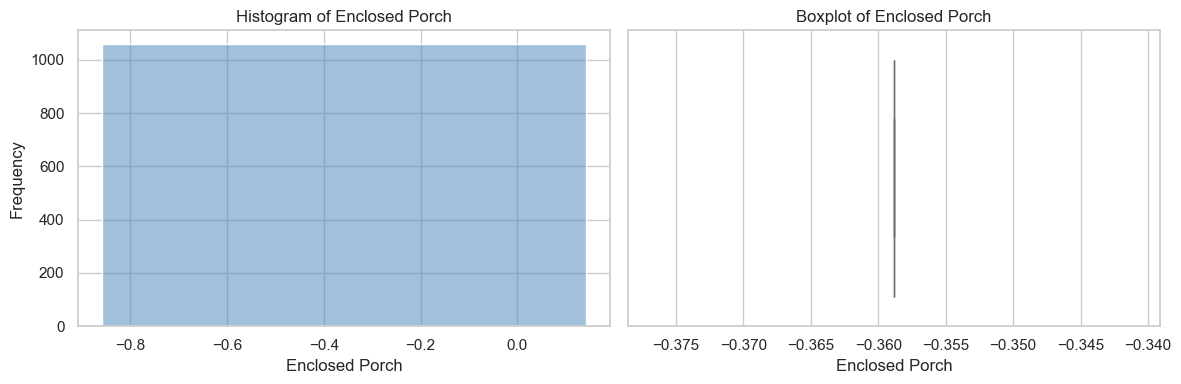

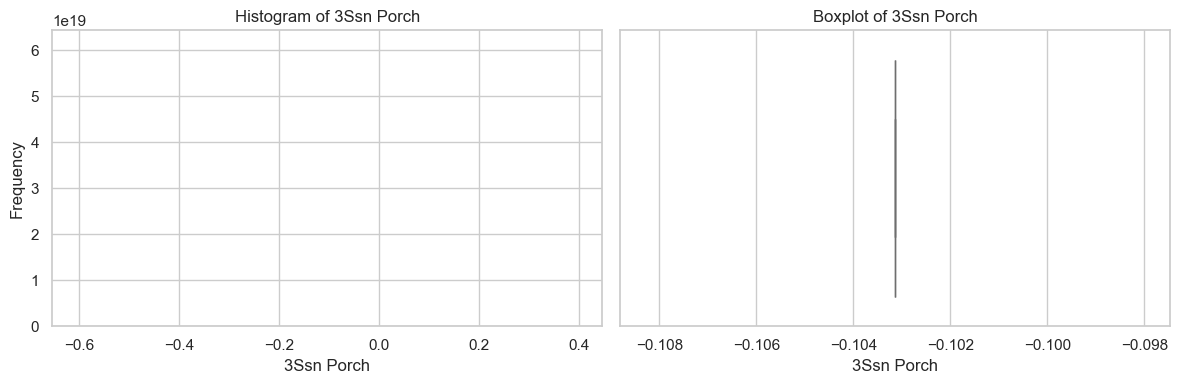

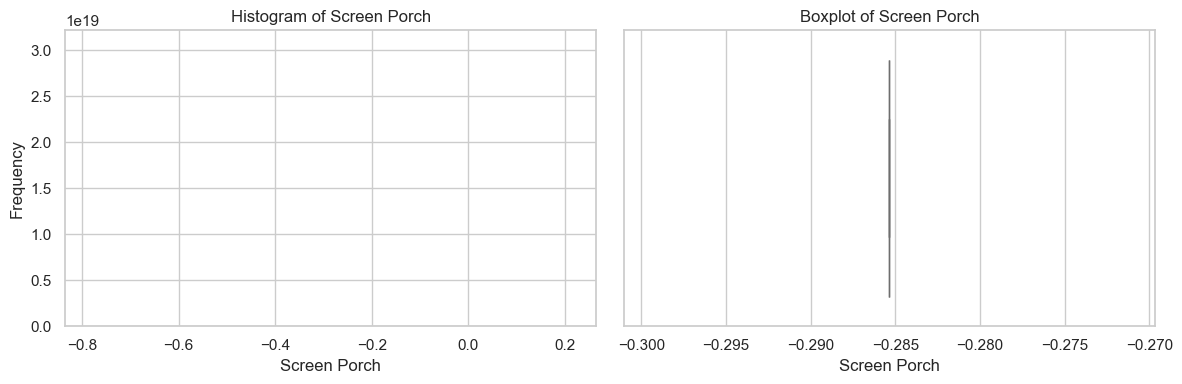

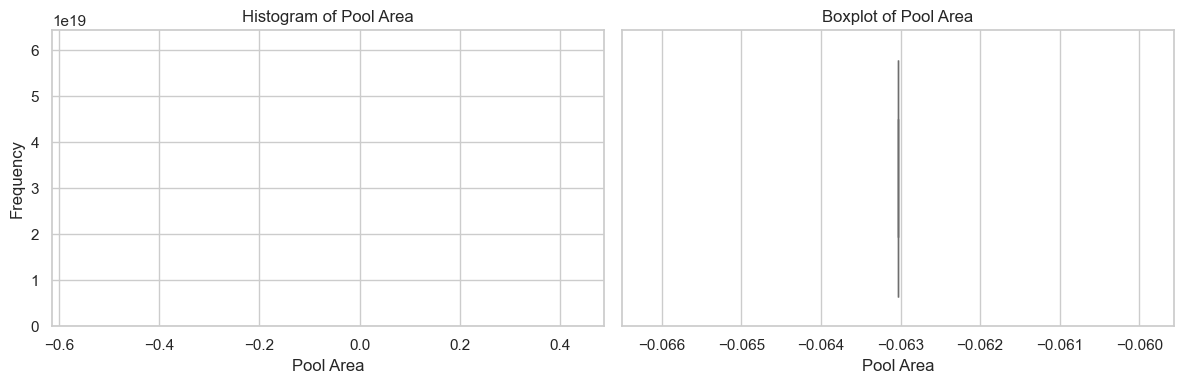

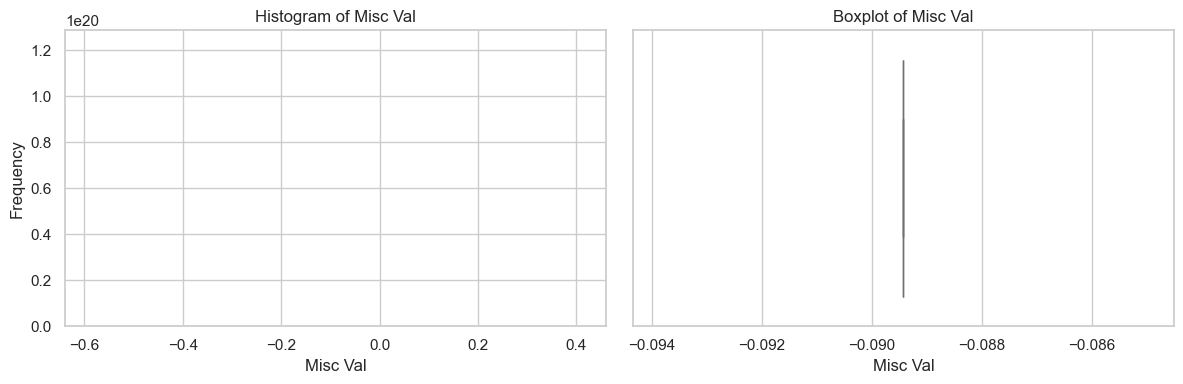

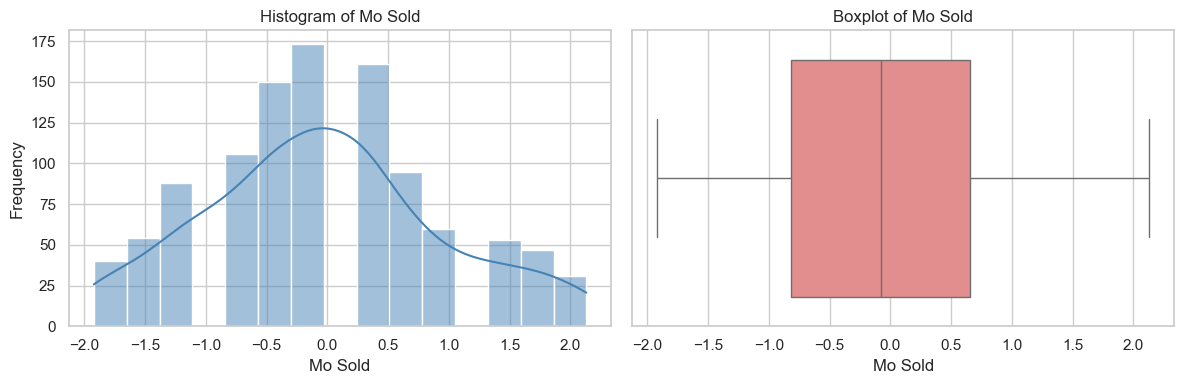

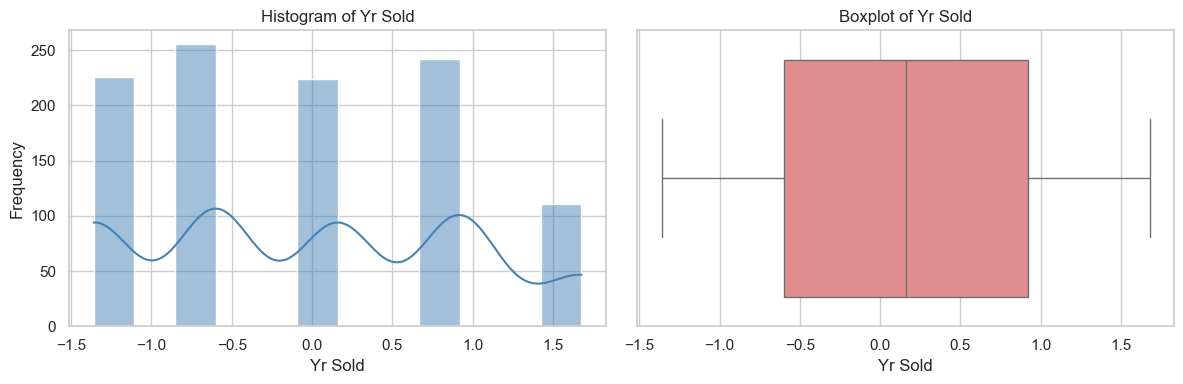

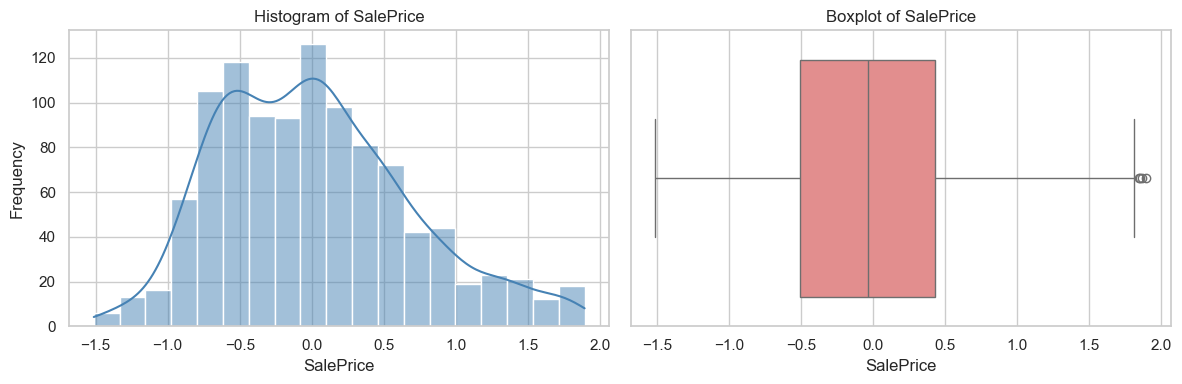

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set plot style
sns.set(style="whitegrid")

# Loop through each numerical column
for col in num_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

**CREATE SCATTER PLOTS BETWEEN SalePrice AND KEY FEATURES LIKE GrLivArea, OverallQual, etc.**

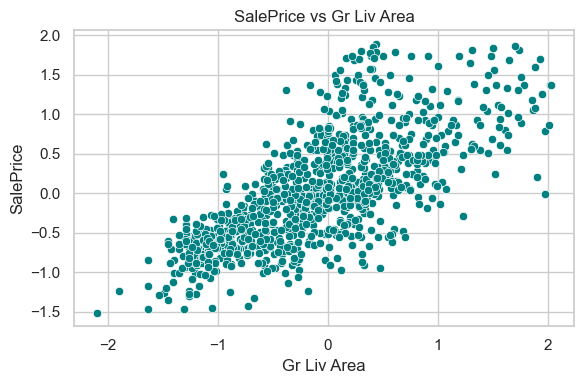

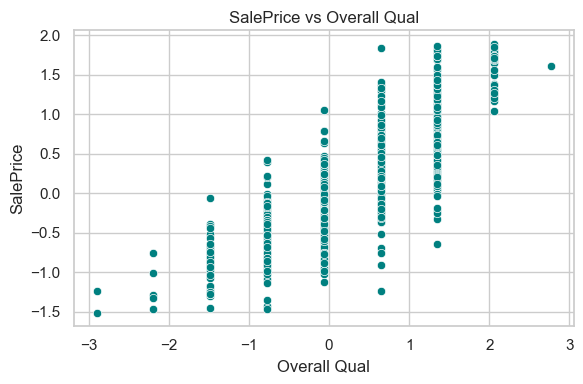

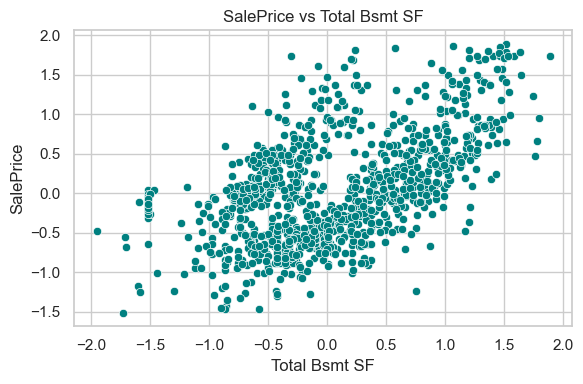

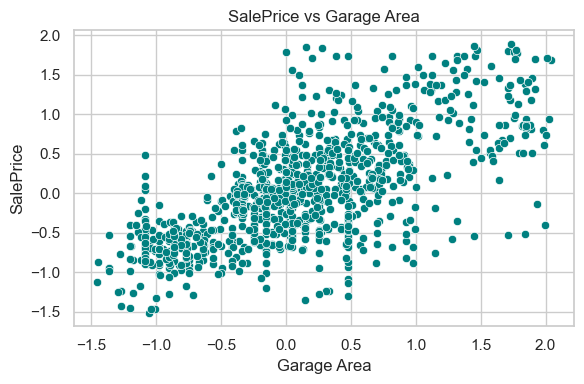

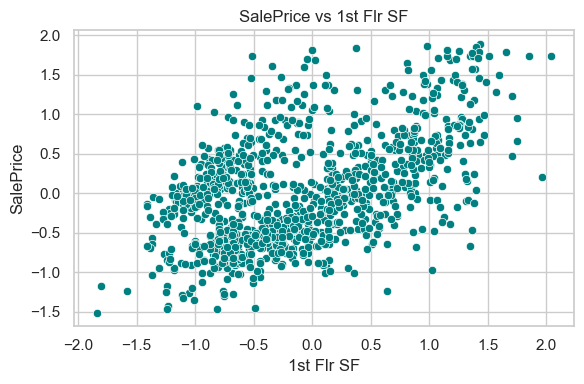

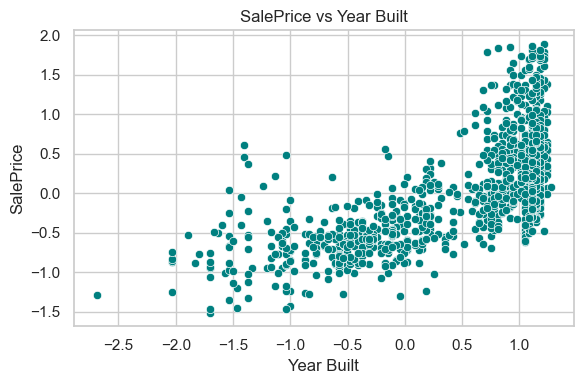

In [80]:
# First, ensure the key features are still present in the cleaned dataset
key_features = ['Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Year Built']
key_features = [col for col in key_features if col in df.columns]

# Create scatter plots between each feature and SalePrice
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='SalePrice', data=df, color='teal')
    plt.title(f"SalePrice vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.tight_layout()
    plt.show()


**CORRELATION MATRIX**

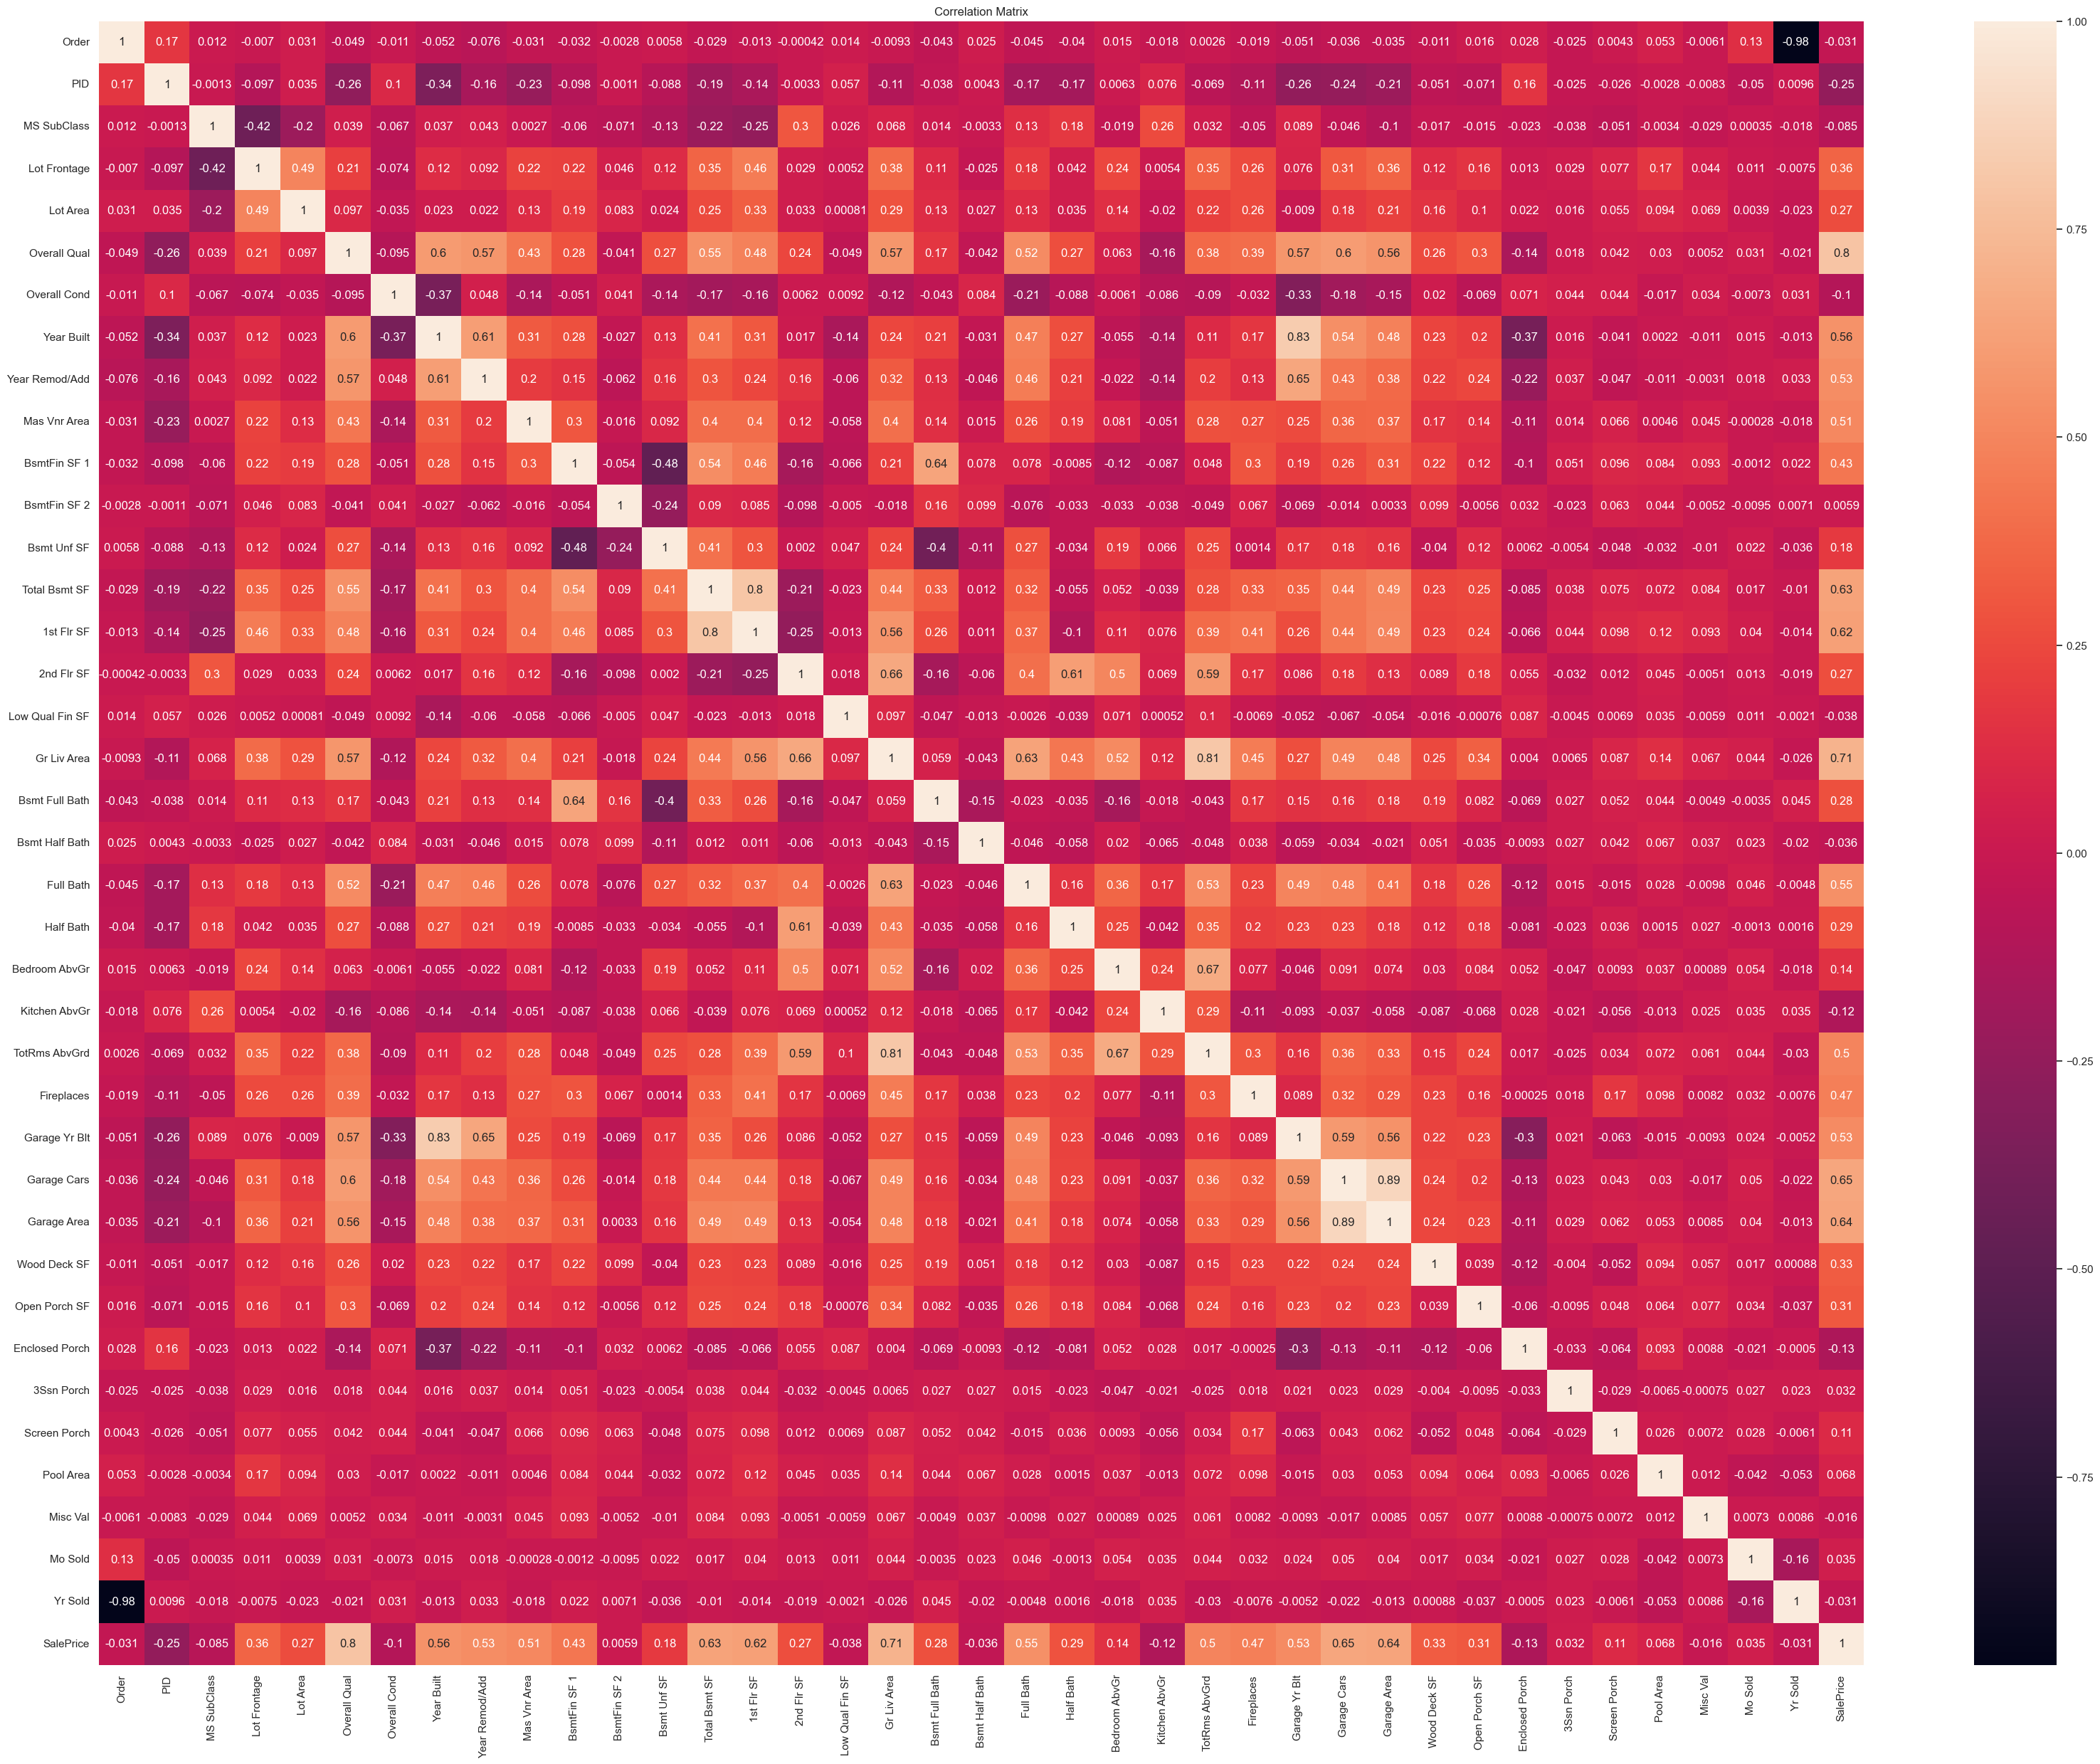

In [45]:
# Correlation analysis for numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = data[numerical_cols].corr()

plt.figure(figsize=(40,30))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### 3. MODEL TRAINING & EVALUATION

**TRAIN-TEST SPLIT**

In [46]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**TRAIN LINEAR REGRESSION MODEL**

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**PREDICTION**

In [50]:
y_pred = model.predict(X_test)
y_pred

array([-3.75381470e-01,  9.66644287e-02,  8.68652344e-01, -8.99444580e-01,
       -3.92913818e-01, -5.64514160e-01,  3.13232422e-01, -6.32141113e-01,
       -1.10147095e+00,  9.31579590e-01, -6.65008545e-01, -9.58862305e-01,
       -5.08575439e-02,  7.02224731e-01, -4.71771240e-01, -3.75183105e-01,
        2.98873901e-01,  5.17501831e-01,  3.44390869e-02, -8.11767578e-02,
       -6.60919189e-01, -5.64498901e-01,  1.13723755e-01, -1.53645325e+00,
        2.50244141e-03,  2.28881836e-02,  1.02203369e-01, -7.58651733e-01,
       -9.74105835e-01, -8.71093750e-01,  5.01480103e-01, -6.71752930e-01,
        6.18164062e-01,  6.02874756e-02, -1.25502014e+00, -1.17095947e-01,
       -9.11788940e-01,  2.22869873e-01, -1.02792358e+00, -9.25308228e-01,
        1.41174316e-01, -2.43286133e-01, -3.26416016e-01, -5.70495605e-01,
       -2.54196167e-01,  7.39471436e-01, -4.43374634e-01,  1.34053040e+00,
       -7.23159790e-01,  8.31558228e-01,  1.43269348e+00, -8.05313110e-01,
        1.90734863e-01,  

**EVALUATION METRICS**

In [51]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared: -4862855723445158912.0000
MAE: 199423095.6729
RMSE: 1475429757.7597


**ACTUAL VS PREDICTED PLOT**

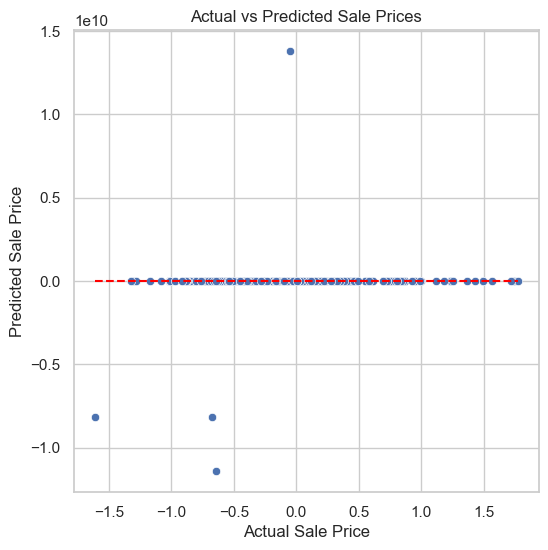

In [52]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()